In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt



In [3]:
data = pd.read_csv('BITRE_Fatality-Table 1.csv')
data.head()

/var/folders/3l/xh28kn0j7_7d5hh7fgz188940000gn/T/ipykernel_3651/1511047806.py:1: DtypeWarning: Columns (10,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('BITRE_Fatality-Table 1.csv')


Crash ID State  Month  Year Dayweek   Time Crash Type Bus Involvement  \
0  20245021    WA      4  2024  Friday  00:31     Single              No   
1  20245021    WA      4  2024  Friday  00:31     Single              No   
2  20245021    WA      4  2024  Friday  00:31     Single              No   
3  20245021    WA      4  2024  Friday  00:31     Single              No   
4  20243023   Qld      4  2024  Friday  01:00     Single              No   

  Heavy Rigid Truck Involvement Articulated Truck Involvement  ... Age  \
0                            No                            No  ...  19   
1                            No                            No  ...   9   
2                            No                            No  ...  21   
3                            No                            No  ...  45   
4                            No                            No  ...  24   

  National Remoteness Areas SA4 Name 2021  National LGA Name 2021  \
0                       NaN           NaN                     NaN   
1                       NaN           NaN                     NaN   
2                       NaN           NaN                     NaN   
3                       NaN           NaN                     NaN   
4  Outer Regional Australia        Cairns                  Cairns   

  National Road Type Christmas Period Easter Period Age Group Day of week  \
0                NaN               No            No  17_to_25     Weekday   
1                NaN               No            No   0_to_16     Weekday   
2                NaN               No            No  17_to_25     Weekday   
3                NaN               No            No  40_to_64     Weekday   
4         Local Road               No            No  17_to_25     Weekday   

  Time of day  
0       Night  
1       Night  
2       Night  
3       Night  
4       Night  

[5 rows x 23 columns]

01:31:15 - cmdstanpy - INFO - Chain [1] start processing
01:31:15 - cmdstanpy - INFO - Chain [1] done processing
01:31:15 - cmdstanpy - INFO - Chain [1] start processing
01:31:15 - cmdstanpy - INFO - Chain [1] done processing
01:31:15 - cmdstanpy - INFO - Chain [1] start processing
01:31:15 - cmdstanpy - INFO - Chain [1] done processing
01:31:15 - cmdstanpy - INFO - Chain [1] start processing
01:31:15 - cmdstanpy - INFO - Chain [1] done processing
01:31:16 - cmdstanpy - INFO - Chain [1] start processing
01:31:16 - cmdstanpy - INFO - Chain [1] done processing
01:31:16 - cmdstanpy - INFO - Chain [1] start processing
01:31:16 - cmdstanpy - INFO - Chain [1] done processing
01:31:16 - cmdstanpy - INFO - Chain [1] start processing
01:31:16 - cmdstanpy - INFO - Chain [1] done processing
01:31:16 - cmdstanpy - INFO - Chain [1] start processing
01:31:16 - cmdstanpy - INFO - Chain [1] done processing


Evaluation Metrics for the Test Period (2023) - State:
ACT - MAE: 0.47, MSE: 0.41, MAPE: 47.03%, R2: 0.00
Forecast vs Actual for first three months of 2024 for ACT:
            ds      yhat  yhat_lower  yhat_upper
273 2024-01-01  0.641613   -1.365264    2.766517
274 2024-03-01  1.687494   -0.401062    3.703199
        Date  Counts
0 2024-01-01       1
1 2024-03-01       1

Forecast for ACT in 2030:
            ds      yhat  yhat_lower  yhat_upper
345 2030-01-31  0.624683   -1.406503    2.727115
346 2030-02-28  0.918543   -1.116239    3.069915
347 2030-03-31  1.867960   -0.122215    3.988993
348 2030-04-30  0.774481   -1.260367    2.781565
349 2030-05-31  1.445582   -0.425764    3.471096
350 2030-06-30  1.507489   -0.464408    3.674442
351 2030-07-31  0.944457   -1.123757    2.876743
352 2030-08-31  1.404447   -0.582912    3.464024
353 2030-09-30  1.063856   -0.980592    3.030860
354 2030-10-31  0.464989   -1.491166    2.364772
355 2030-11-30  1.797021   -0.180036    3.768367
356 2030-1

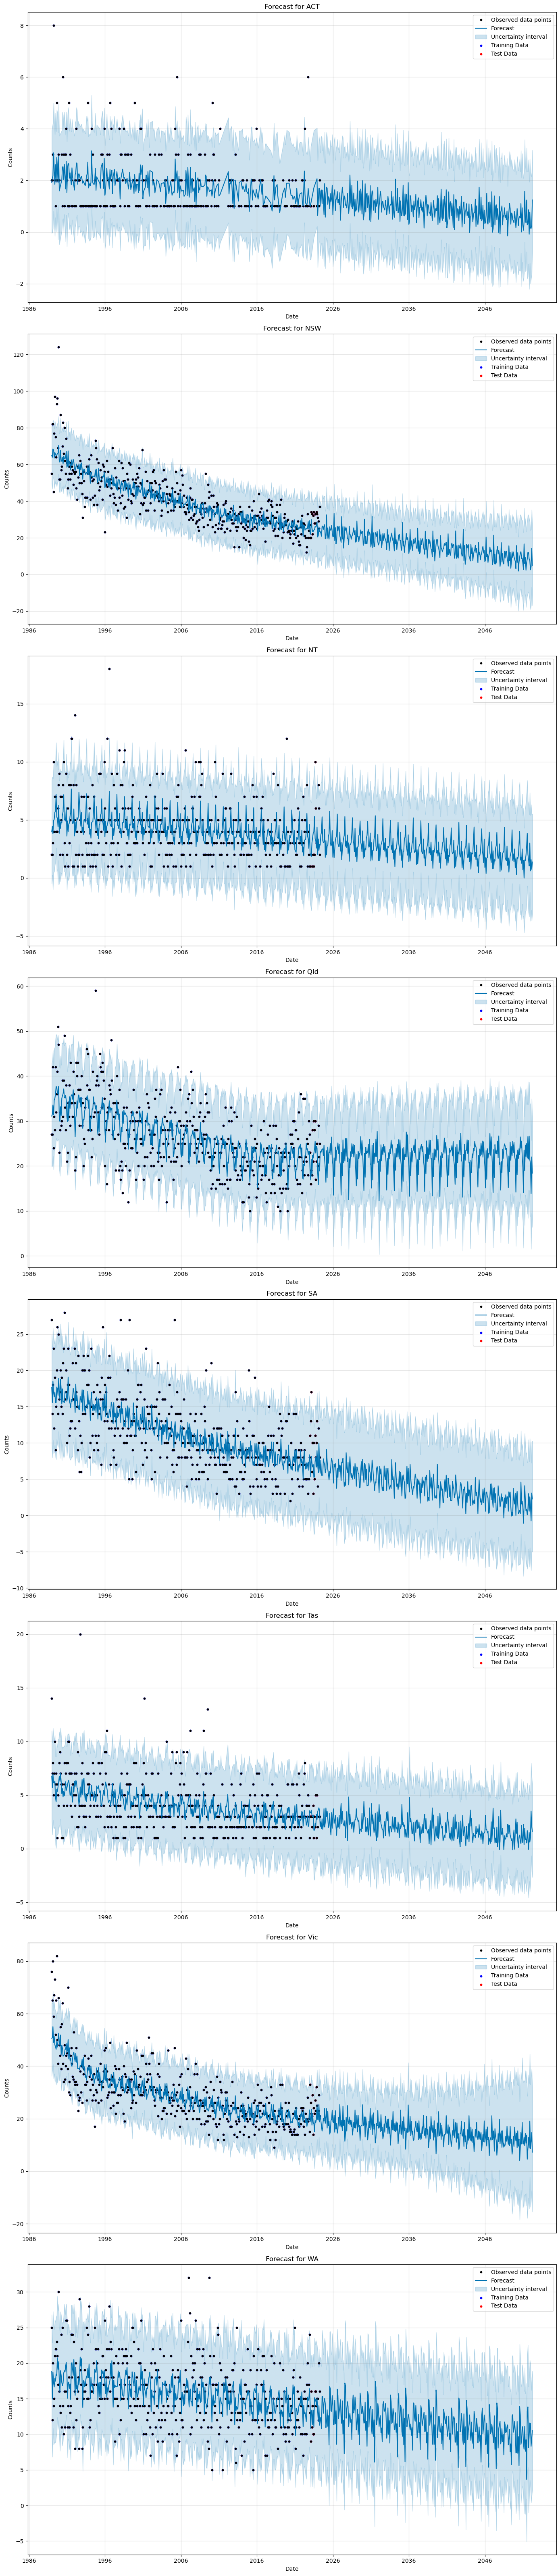

Dickey-Fuller Test Results:

Time of day: ACT
ADF Statistic: -10.210133448903028
p-value: 5.666793501229699e-18
Critical Value 1%: -3.4544435065994437
Critical Value 5%: -2.8721468827772774
Critical Value 10%: -2.572422013959188

Time of day: NSW
ADF Statistic: -4.424532271952606
p-value: 0.00026852383039471735
Critical Value 1%: -3.4463221132914486
Critical Value 5%: -2.8685808072418824
Critical Value 10%: -2.570520529031954

Time of day: NT
ADF Statistic: -3.9483650996061237
p-value: 0.0017063764187094333
Critical Value 1%: -3.4468876315017423
Critical Value 5%: -2.868829424528516
Critical Value 10%: -2.570653059771218

Time of day: Qld
ADF Statistic: -2.436974237656826
p-value: 0.13157141935584937
Critical Value 1%: -3.4463221132914486
Critical Value 5%: -2.8685808072418824
Critical Value 10%: -2.570520529031954

Time of day: SA
ADF Statistic: -2.160279160203197
p-value: 0.22097624225282608
Critical Value 1%: -3.4465195891135845
Critical Value 5%: -2.8686676281678634
Critical Value 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.tsa.stattools import adfuller

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = pd.Series(y_true), pd.Series(y_pred)
    return (abs((y_true - y_pred) / y_true)).mean() * 100

# Convert the 'Year' and 'Month' columns to a single datetime column
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))

# Filter data up to 2022 for training and 2023 for testing
train_data = data[data['Year'] <= 2022]
test_data = data[data['Year'] == 2023]

# Aggregate the number of occurrences of each feature per month for training data
def aggregate_counts(data, feature):
    return data.groupby(['Date', feature]).size().reset_index(name='Counts')

# Prepare the data for Prophet and forecast
def forecast_feature(data, feature):
    counts = aggregate_counts(data, feature)
    
    models = {}
    forecasts = {}
    for value in counts[feature].unique():
        value_data = counts[counts[feature] == value]
        value_data = value_data[['Date', 'Counts']].rename(columns={'Date': 'ds', 'Counts': 'y'})

        # Initialize and fit the Prophet model
        model = Prophet(interval_width=0.95,
                        yearly_seasonality=True,
                        daily_seasonality=True,
                        weekly_seasonality=True,
                        seasonality_mode='additive')
        model.fit(value_data)
        models[value] = model

        # Create a dataframe for future dates including 2023 (test period) and beyond
        future_dates = model.make_future_dataframe(periods=(2050 - 2022) * 12, freq='M')

        # Predict future values
        forecast = model.predict(future_dates)
        forecasts[value] = forecast
    
    return models, forecasts

# Forecast for a specific feature
feature = 'State'  # Change this to the desired feature
time_of_day_models, forecasts = forecast_feature(data, feature)

# Calculate and print evaluation metrics for the test period (2023)
print(f"Evaluation Metrics for the Test Period (2023) - {feature}:")
for value, forecast in forecasts.items():
    # Filter forecast for 2023
    forecast_2023 = forecast[(forecast['ds'] >= '2023-01-01') & (forecast['ds'] <= '2023-12-31')]

    # Filter actual counts for 2023
    actual_counts_2023 = test_data[test_data[feature] == value].groupby('Date').size().reset_index(name='Counts')
    actual_counts_2023 = actual_counts_2023.rename(columns={'Date': 'ds', 'Counts': 'y'})

    # Ensure the forecast and actual data are aligned
    forecast_2023 = forecast_2023.set_index('ds').loc[actual_counts_2023['ds']].reset_index()

    # Calculate evaluation metrics
    mae = mean_absolute_error(actual_counts_2023['y'], forecast_2023['yhat'])
    mse = mean_squared_error(actual_counts_2023['y'], forecast_2023['yhat'])
    mape = mean_absolute_percentage_error(actual_counts_2023['y'], forecast_2023['yhat'])
    r2 = r2_score(actual_counts_2023['y'], forecast_2023['yhat'])

    print(f"{value} - MAE: {mae:.2f}, MSE: {mse:.2f}, MAPE: {mape:.2f}%, R2: {r2:.2f}")
    print(f"Forecast vs Actual for first three months of 2024 for {value}:")
    future_2024 = forecast[(forecast['ds'] >= '2024-01-01') & (forecast['ds'] <= '2024-03-31')]
    print(future_2024[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

    # Filter actual counts for first three months of 2024
    actual_counts_2024 = data[(data['Date'] >= '2024-01-01') & (data['Date'] <= '2024-03-31') & (data[feature] == value)]
    actual_counts_2024 = actual_counts_2024.groupby('Date').size().reset_index(name='Counts')
    print(actual_counts_2024)
    print()

    # Print forecast for 2030, 2040, and 2050
    future_2030 = forecast[(forecast['ds'] >= '2030-01-01') & (forecast['ds'] <= '2030-12-31')]
    future_2040 = forecast[(forecast['ds'] >= '2040-01-01') & (forecast['ds'] <= '2040-12-31')]
    future_2050 = forecast[(forecast['ds'] >= '2050-01-01') & (forecast['ds'] <= '2050-12-31')]
    
    print(f"Forecast for {value} in 2030:")
    print(future_2030[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
    print()
    
    print(f"Forecast for {value} in 2040:")
    print(future_2040[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
    print()
    
    print(f"Forecast for {value} in 2050:")
    print(future_2050[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
    print()

# Plot the forecasts
fig, axes = plt.subplots(nrows=len(forecasts), ncols=1, figsize=(14, 8*len(forecasts)))

for ax, (value, forecast) in zip(axes, forecasts.items()):
    model = time_of_day_models[value]
    model.plot(forecast, ax=ax, xlabel='Date', ylabel='Counts')
    
    # Plot training data
    train_time_data = data[data[feature] == value].groupby('Date').size().reset_index(name='Counts')
    ax.scatter(train_time_data['Date'], train_time_data['Counts'], color='blue', s=10, label='Training Data')
    
    # Plot test data
    test_time_data = test_data[test_data[feature] == value].groupby('Date').size().reset_index(name='Counts')
    ax.scatter(test_time_data['Date'], test_time_data['Counts'], color='red', s=10, label='Test Data')
    
    ax.legend()
    ax.set_title(f'Forecast for {value}')

# Show the plot
plt.tight_layout()
plt.show()

# Save the plot

# Perform Dickey-Fuller Test
print("Dickey-Fuller Test Results:")
for value, forecast in forecasts.items():
    time_data = data[data[feature] == value].groupby('Date').size().reset_index(name='Counts')
    adf_result = adfuller(time_data['Counts'])
    print(f"\nTime of day: {value}")
    print(f"ADF Statistic: {adf_result[0]}")
    print(f"p-value: {adf_result[1]}")
    for key, value in adf_result[4].items():
        print(f"Critical Value {key}: {value}")

# Print actual counts for each year from 2013 to 2023
print("\nActual Counts per Year (2013-2023):")
for year in range(2013, 2024):
    year_counts = data[data['Year'] == year].groupby('Year').size().reset_index(name='Counts')
    print(f"Year {year}: {year_counts['Counts'].sum()} counts")


15:15:45 - cmdstanpy - INFO - Chain [1] start processing
15:15:45 - cmdstanpy - INFO - Chain [1] done processing


Actual fatalities for 2023:
State       ACT   NSW   NT   Qld    SA  Tas   Vic    WA
Date                                                   
2024-01-01  1.0  31.0  3.0  20.0   4.0  2.0  22.0  15.0
2024-02-01  0.0  29.0  8.0  29.0  12.0  0.0  23.0  12.0
2024-03-01  1.0  25.0  6.0  22.0   7.0  3.0  29.0  20.0
2024-04-01  2.0  37.0  2.0  25.0   8.0  3.0  21.0  16.0


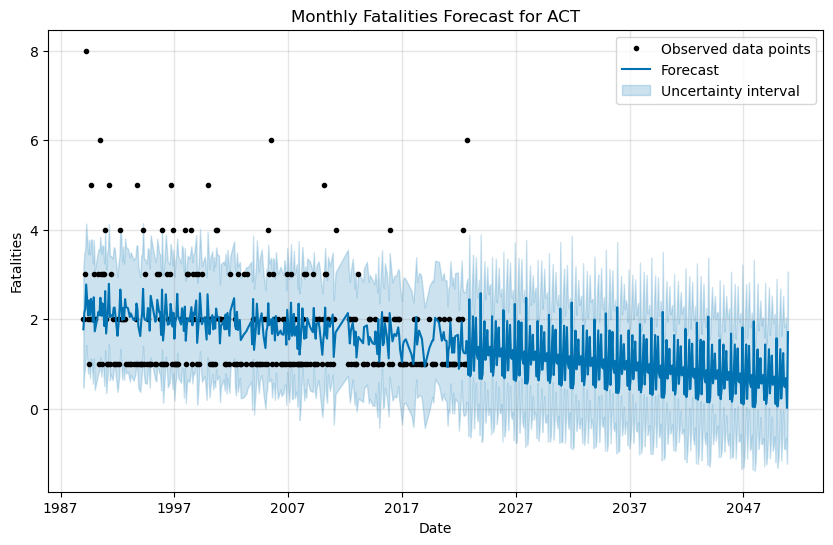

15:15:45 - cmdstanpy - INFO - Chain [1] start processing
15:15:45 - cmdstanpy - INFO - Chain [1] done processing


Forecast for 2023 for state ACT:
            ds      yhat  yhat_lower  yhat_upper
272 2023-01-31  0.858788   -0.450901    2.268641
273 2023-02-28  1.493353    0.150674    2.905959
274 2023-03-31  2.065290    0.699371    3.439701
275 2023-04-30  0.844059   -0.439515    2.120161
276 2023-05-31  1.407603    0.043146    2.807122
277 2023-06-30  2.031878    0.575263    3.385029
278 2023-07-31  1.207770   -0.168042    2.584581
279 2023-08-31  1.111710   -0.279295    2.483467
280 2023-09-30  1.382542    0.111756    2.881020
281 2023-10-31  0.668362   -0.588137    2.062216
282 2023-11-30  2.581023    1.186835    3.890424
283 2023-12-31  0.662356   -0.744412    2.047566
No data to evaluate for state ACT in 2023
Forecast for 2050 for state ACT:
            ds      yhat  yhat_lower  yhat_upper
596 2050-01-31  0.217680   -1.108389    1.645156
597 2050-02-28  0.757736   -0.641491    2.124790
598 2050-03-31  1.330026   -0.024759    2.678894
599 2050-04-30  0.225061   -1.161682    1.626902
600 2050-0

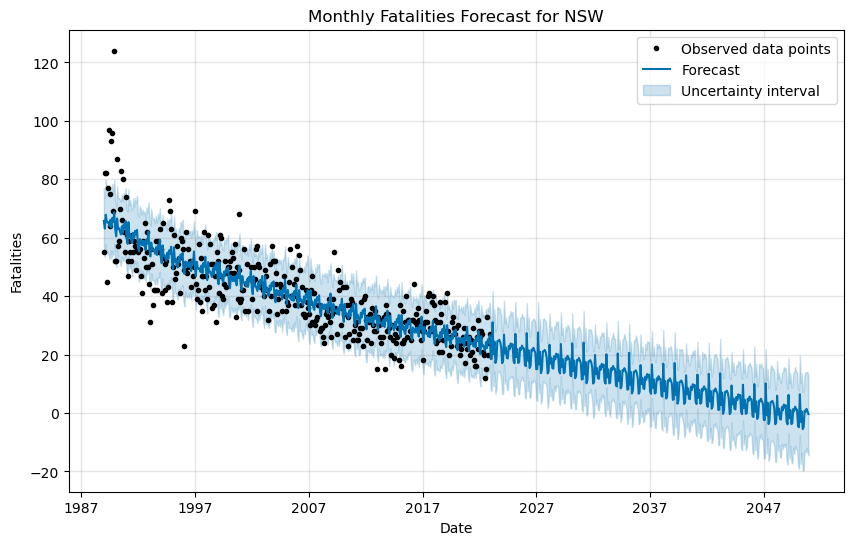

15:15:46 - cmdstanpy - INFO - Chain [1] start processing
15:15:46 - cmdstanpy - INFO - Chain [1] done processing


Forecast for 2023 for state NSW:
            ds       yhat  yhat_lower  yhat_upper
409 2023-01-31  18.583797    7.754396   29.987620
410 2023-02-28  31.052350   20.318208   41.699242
411 2023-03-31  20.134094    9.229748   31.240003
412 2023-04-30  24.435324   14.248318   35.377638
413 2023-05-31  17.135804    6.694238   27.830532
414 2023-06-30  18.319441    8.011297   29.133364
415 2023-07-31  24.580791   14.073394   36.368982
416 2023-08-31  24.692816   14.027492   35.520729
417 2023-09-30  25.062920   14.546570   36.047672
418 2023-10-31  24.251471   13.229284   34.773759
419 2023-11-30  22.500380   11.574469   33.555900
420 2023-12-31  17.043367    6.621371   27.751263
No data to evaluate for state NSW in 2023
Forecast for 2050 for state NSW:
            ds      yhat  yhat_lower  yhat_upper
733 2050-01-31 -4.858804  -19.058229    7.795711
734 2050-02-28  6.431121   -7.621170   19.722251
735 2050-03-31 -2.993459  -17.358518   10.140320
736 2050-04-30  0.531939  -13.533794   13.5711

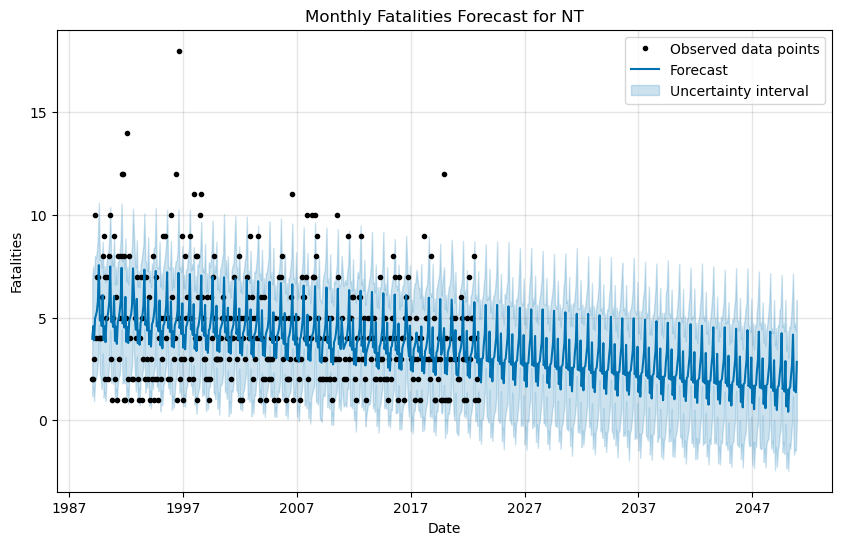

15:15:46 - cmdstanpy - INFO - Chain [1] start processing
15:15:46 - cmdstanpy - INFO - Chain [1] done processing


Forecast for 2023 for state NT:
            ds      yhat  yhat_lower  yhat_upper
398 2023-01-31  2.987314    0.014076    5.886411
399 2023-02-28  1.846228   -1.157646    4.945387
400 2023-03-31  3.003559    0.112893    5.847728
401 2023-04-30  3.020871    0.035008    6.032085
402 2023-05-31  3.720595    0.635600    6.627066
403 2023-06-30  4.217534    1.346479    7.151782
404 2023-07-31  5.621464    2.541996    8.563390
405 2023-08-31  2.896640    0.173519    5.856251
406 2023-09-30  3.019087    0.087341    6.026242
407 2023-10-31  2.853420   -0.112499    5.891727
408 2023-11-30  4.324379    1.498199    7.371951
409 2023-12-31  2.097376   -0.834253    5.267076
No data to evaluate for state NT in 2023
Forecast for 2050 for state NT:
            ds      yhat  yhat_lower  yhat_upper
722 2050-01-31  1.478228   -1.569655    4.367314
723 2050-02-28  0.411657   -2.456897    3.028682
724 2050-03-31  1.553937   -1.161339    4.566304
725 2050-04-30  1.590237   -1.386419    4.493592
726 2050-05-3

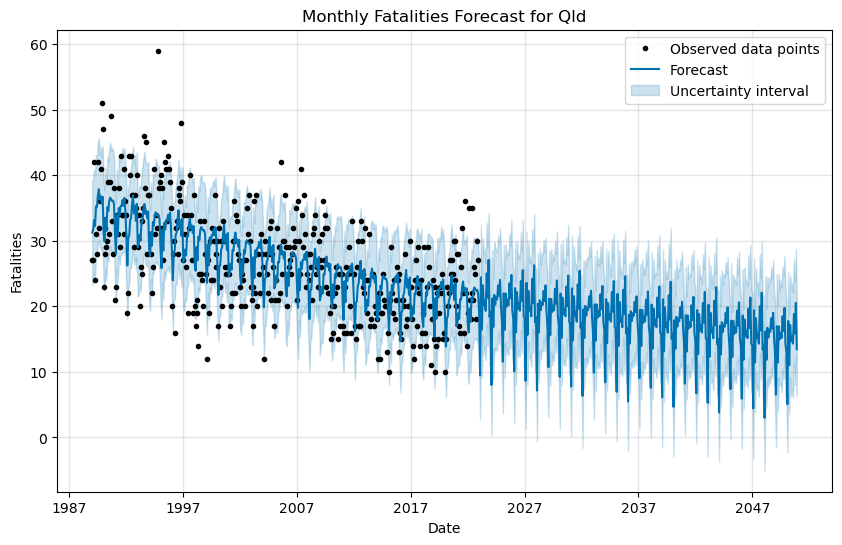

15:15:46 - cmdstanpy - INFO - Chain [1] start processing
15:15:47 - cmdstanpy - INFO - Chain [1] done processing


Forecast for 2023 for state Qld:
            ds       yhat  yhat_lower  yhat_upper
409 2023-01-31   9.458183    2.736038   16.519241
410 2023-02-28  24.424266   16.873856   32.484576
411 2023-03-31  16.473181    9.059914   24.602999
412 2023-04-30  23.207622   15.557747   30.341329
413 2023-05-31  20.207898   12.681099   27.978538
414 2023-06-30  20.770125   13.764294   28.833131
415 2023-07-31  19.319057   11.836984   26.628857
416 2023-08-31  25.037280   17.263811   32.716177
417 2023-09-30  21.342880   13.902120   28.955531
418 2023-10-31  27.106139   19.202368   34.275422
419 2023-11-30  18.421074   11.025747   26.200152
420 2023-12-31  19.172988   11.786768   27.426927
No data to evaluate for state Qld in 2023
Forecast for 2050 for state Qld:
            ds       yhat  yhat_lower  yhat_upper
733 2050-01-31   5.072069   -2.353422   12.683948
734 2050-02-28  17.775153    9.696985   25.226474
735 2050-03-31  11.036857    3.575800   18.879652
736 2050-04-30  17.162611    9.151117   24

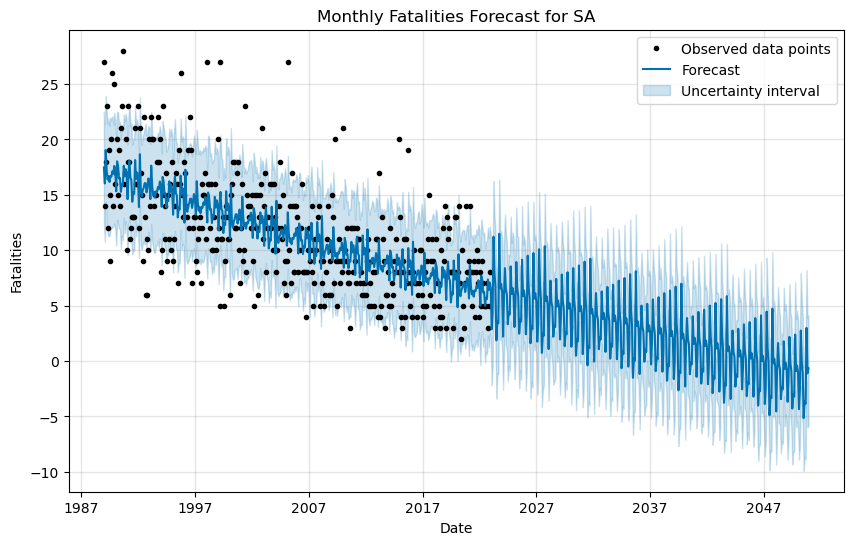

15:15:47 - cmdstanpy - INFO - Chain [1] start processing
15:15:47 - cmdstanpy - INFO - Chain [1] done processing


Forecast for 2023 for state SA:
            ds       yhat  yhat_lower  yhat_upper
409 2023-01-31   2.877580   -2.175886    7.748568
410 2023-02-28   4.407305   -0.596830    9.146649
411 2023-03-31  11.217568    6.579190   16.249541
412 2023-04-30   7.953471    3.139800   13.053393
413 2023-05-31   6.620182    1.616410   11.848968
414 2023-06-30   1.866306   -3.378500    6.650493
415 2023-07-31   3.595898   -1.128653    8.367808
416 2023-08-31   3.417310   -1.206401    8.616965
417 2023-09-30  11.485101    6.714437   16.392418
418 2023-10-31   6.554920    1.896578   11.505727
419 2023-11-30   6.962727    2.199850   11.715205
420 2023-12-31   6.225904    1.077032   11.057891
No data to evaluate for state SA in 2023
Forecast for 2050 for state SA:
            ds      yhat  yhat_lower  yhat_upper
733 2050-01-31 -4.336670   -8.888614    0.478971
734 2050-02-28 -2.627890   -7.646160    2.204553
735 2050-03-31  2.753644   -2.279963    7.933583
736 2050-04-30 -0.032355   -4.703159    5.424616


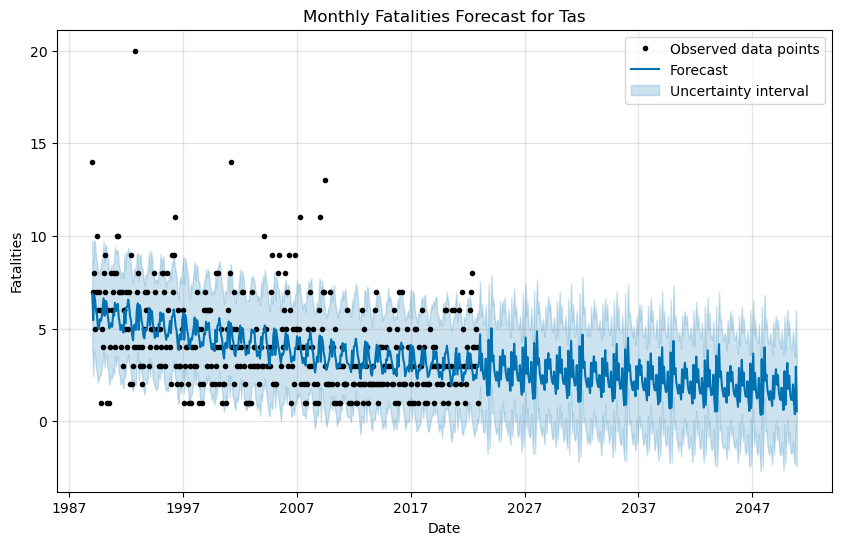

15:15:47 - cmdstanpy - INFO - Chain [1] start processing
15:15:47 - cmdstanpy - INFO - Chain [1] done processing


Forecast for 2023 for state Tas:
            ds      yhat  yhat_lower  yhat_upper
391 2023-01-31  4.693164    1.853938    7.543310
392 2023-02-28  2.732167   -0.116829    5.674242
393 2023-03-31  3.641380    0.645736    6.340803
394 2023-04-30  2.643798   -0.471663    5.675271
395 2023-05-31  2.267070   -0.627766    5.167941
396 2023-06-30  2.364437   -0.532698    5.385246
397 2023-07-31  3.378751    0.622979    6.283064
398 2023-08-31  2.063388   -0.714294    4.907360
399 2023-09-30  1.383444   -1.716521    4.308025
400 2023-10-31  4.397970    1.302842    7.416088
401 2023-11-30  1.414153   -1.457846    4.240705
402 2023-12-31  3.150913    0.174722    6.050130
No data to evaluate for state Tas in 2023
Forecast for 2050 for state Tas:
            ds      yhat  yhat_lower  yhat_upper
715 2050-01-31  3.146694    0.039046    6.024193
716 2050-02-28  1.749964   -1.219512    4.668712
717 2050-03-31  2.461120   -0.560668    5.419254
718 2050-04-30  1.531176   -1.466818    4.386910
719 2050-0

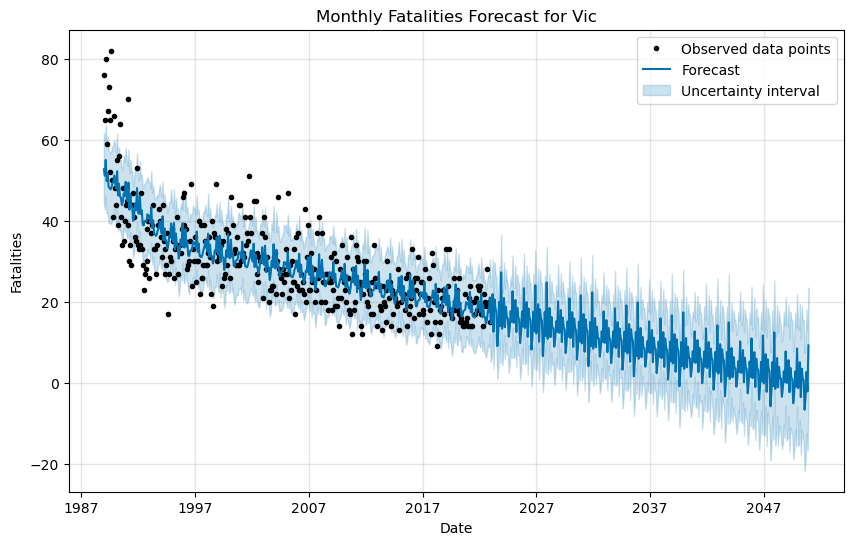

15:15:48 - cmdstanpy - INFO - Chain [1] start processing
15:15:48 - cmdstanpy - INFO - Chain [1] done processing


Forecast for 2023 for state Vic:
            ds       yhat  yhat_lower  yhat_upper
409 2023-01-31  15.872978    6.331422   24.225783
410 2023-02-28  21.918759   12.905554   30.533411
411 2023-03-31  12.629343    3.508942   20.809556
412 2023-04-30  20.657863   12.187940   29.776120
413 2023-05-31  18.419152   10.083019   26.913592
414 2023-06-30  17.718203    8.787212   26.131791
415 2023-07-31   9.067937    1.058029   18.312527
416 2023-08-31  12.945698    3.889629   22.432865
417 2023-09-30  19.988308   10.367336   28.710765
418 2023-10-31  14.051568    4.810421   23.109383
419 2023-11-30  27.301468   19.236430   36.528795
420 2023-12-31  13.366409    4.361626   22.289684
No data to evaluate for state Vic in 2023
Forecast for 2050 for state Vic:
            ds      yhat  yhat_lower  yhat_upper
733 2050-01-31 -0.620138  -15.355371   13.132383
734 2050-02-28  5.111278   -9.250639   19.508730
735 2050-03-31 -3.500643  -17.811851   10.730029
736 2050-04-30  3.525574  -11.545969   18.9422

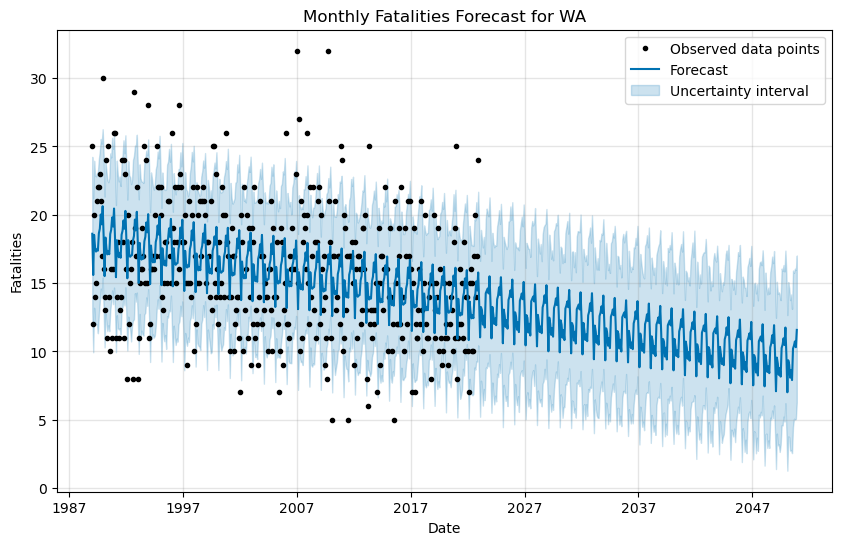

Forecast for 2023 for state WA:
            ds       yhat  yhat_lower  yhat_upper
409 2023-01-31  11.028325    5.221960   16.627983
410 2023-02-28  13.243708    7.858146   18.890102
411 2023-03-31  13.034694    7.340851   18.249444
412 2023-04-30  11.965487    6.036284   17.607195
413 2023-05-31  12.607990    7.251701   18.379951
414 2023-06-30  11.747949    6.439226   17.146795
415 2023-07-31  14.255932    8.812919   19.667927
416 2023-08-31  14.441129    8.776039   20.454577
417 2023-09-30  14.600528    9.177736   20.144398
418 2023-10-31  14.242807    8.900423   19.882215
419 2023-11-30  15.495588    9.795985   21.266952
420 2023-12-31  13.550380    7.954955   19.277650
No data to evaluate for state WA in 2023
Forecast for 2050 for state WA:
            ds       yhat  yhat_lower  yhat_upper
733 2050-01-31   7.009697    1.271090   12.659442
734 2050-02-28   9.350263    3.778314   15.076206
735 2050-03-31   9.024350    3.728073   14.640775
736 2050-04-30   8.080363    2.738786   13.75

In [5]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# اطمینان از نوع داده‌ای صحیح ستون‌ها
data['Year'] = data['Year'].astype(int)
data['Month'] = data['Month'].astype(int)
data['State'] = data['State'].astype(str)

# ایجاد ستون تاریخ از سال و ماه
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))

# تجمیع داده‌ها بر اساس تاریخ و ایالت
monthly_fatalities = data.groupby(['Date', 'State']).size().reset_index(name='Fatalities')

# استخراج مقادیر واقعی برای سال 2023
actual_2023 = monthly_fatalities[(monthly_fatalities['Date'] >= '2024-01-01') & (monthly_fatalities['Date'] <= '2024-12-31')]
actual_2023 = actual_2023.pivot(index='Date', columns='State', values='Fatalities').fillna(0)
print('Actual fatalities for 2023:')
print(actual_2023)

def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mae, rmse, mape

def predict_state(state):
    
    state_data = monthly_fatalities[monthly_fatalities['State'] == state]

    state_data = state_data.rename(columns={'Date': 'ds', 'Fatalities': 'y'})

    train_data = state_data[state_data['ds'] < '2022-12-12']

    model = Prophet(yearly_seasonality=True, daily_seasonality=False, weekly_seasonality=False)
    model.fit(train_data)

    last_date = train_data['ds'].max()
    periods_to_predict = ((2050 - last_date.year) * 12) - last_date.month + 12  # From the next month to 2050 inclusive

    future = model.make_future_dataframe(periods=periods_to_predict, freq='M')

    forecast = model.predict(future)

    fig, ax = plt.subplots(figsize=(10, 6))
    model.plot(forecast, ax=ax)

    ax.set_title(f'Monthly Fatalities Forecast for {state}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Fatalities')
    ax.legend()
    plt.show()

    # Print the forecast for 2023
    forecast_2023 = forecast[(forecast['ds'] >= '2023-01-01') & (forecast['ds'] <= '2023-12-31')]
    print(f"Forecast for 2023 for state {state}:")
    print(forecast_2023[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

    # Evaluate the model for 2023 if actuals are available
    if state in actual_2023.columns:
        actuals_2023_state = actual_2023[state].reset_index()
        actuals_2023_state.columns = ['ds', 'y']
        combined = pd.merge(actuals_2023_state, forecast_2023[['ds', 'yhat']], on='ds')
        if not combined.empty:
            mae, rmse, mape = evaluate_model(combined['y'], combined['yhat'])
            print(f"Evaluation for 2023 for state {state}:")
            print(f"MAE: {mae}, RMSE: {rmse}, MAPE: {mape}%")
        else:
            print(f"No data to evaluate for state {state} in 2023")
    else:
        print(f"No actual data for state {state} in 2023")

    # Print the forecast for 2050
    forecast_2050 = forecast[(forecast['ds'] >= '2050-01-01') & (forecast['ds'] <= '2050-12-31')]
    print(f"Forecast for 2050 for state {state}:")
    print(forecast_2050[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])


states = monthly_fatalities['State'].unique()

for state in states:
    predict_state(state)


/var/folders/3l/xh28kn0j7_7d5hh7fgz188940000gn/T/ipykernel_3837/2615162.py:1: DtypeWarning: Columns (10,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('BITRE_Fatality-Table 1.csv')


In [11]:


# اطمینان از نوع داده‌ای صحیح ستون‌ها
data['Year'] = data['Year'].astype(int)
data['Month'] = data['Month'].astype(int)
data['State'] = data['State'].astype(str)

# ایجاد ستون تاریخ از سال و ماه
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))

# تجمیع داده‌ها بر اساس تاریخ و ایالت
fatalities_by_state_month = data.groupby(['Date', 'State']).size().reset_index(name='Fatalities')

# استخراج مقادیر واقعی برای سه ماه اول 2024
actual_2024_q1 = fatalities_by_state_month[(fatalities_by_state_month['Date'] >= '2023-01-01') & (fatalities_by_state_month['Date'] <= '2023-12-31')]
actual_2024_q1 = actual_2024_q1.pivot(index='Date', columns='State', values='Fatalities').fillna(0)
print('Actual fatalities for Q1 2023:')
print(actual_2024_q1)


Actual fatalities for Q1 2023:
State       ACT   NSW    NT   Qld    SA  Tas   Vic    WA
Date                                                    
2023-01-01  1.0  20.0   1.0  23.0  11.0  3.0  33.0  13.0
2023-02-01  1.0  20.0   0.0  16.0  13.0  3.0  26.0   9.0
2023-03-01  0.0  34.0   2.0  19.0  17.0  3.0  22.0  16.0
2023-04-01  0.0  33.0   1.0  18.0   6.0  2.0  21.0  11.0
2023-05-01  0.0  22.0   0.0  28.0  10.0  3.0  29.0  14.0
2023-06-01  0.0  32.0   2.0  21.0   3.0  4.0  14.0  10.0
2023-07-01  1.0  34.0   1.0  30.0  10.0  1.0  24.0  10.0
2023-08-01  0.0  28.0   2.0  28.0   5.0  3.0  22.0  14.0
2023-09-01  0.0  33.0  10.0  30.0  11.0  2.0  27.0  16.0
2023-10-01  0.0  28.0   6.0  17.0   8.0  5.0  23.0  16.0
2023-11-01  0.0  34.0   3.0  21.0  10.0  1.0  32.0  14.0
2023-12-01  1.0  33.0   3.0  25.0  13.0  5.0  25.0  15.0


03:48:50 - cmdstanpy - INFO - Chain [1] start processing
03:48:50 - cmdstanpy - INFO - Chain [1] done processing


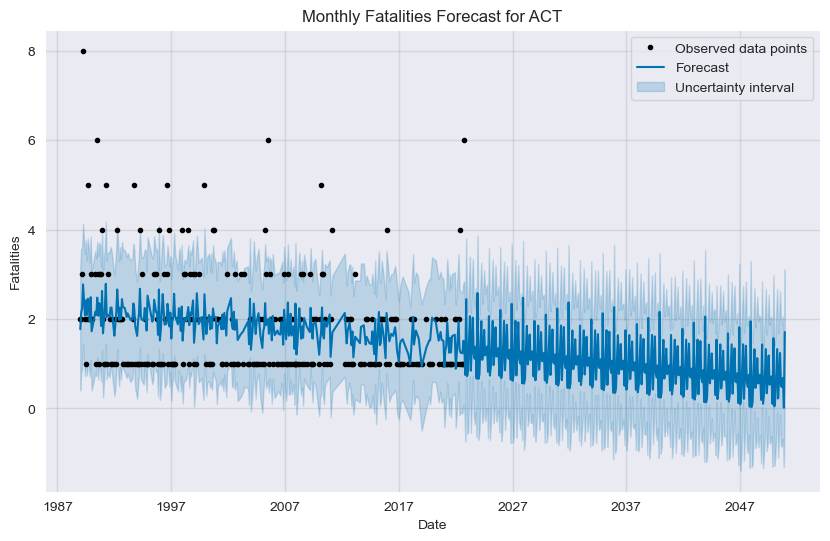

03:48:51 - cmdstanpy - INFO - Chain [1] start processing
03:48:51 - cmdstanpy - INFO - Chain [1] done processing


Forecast for 2023 for state ACT:
            ds      yhat  yhat_lower  yhat_upper
272 2023-01-31  0.858788   -0.510749    2.240216
273 2023-02-28  1.493353    0.068078    2.870807
274 2023-03-31  2.065290    0.713922    3.397083
275 2023-04-30  0.844059   -0.543085    2.138077
276 2023-05-31  1.407603    0.124787    2.707637
277 2023-06-30  2.031878    0.718361    3.340837
278 2023-07-31  1.207770   -0.139574    2.574615
279 2023-08-31  1.111710   -0.352697    2.280617
280 2023-09-30  1.382542   -0.070464    2.693418
281 2023-10-31  0.668362   -0.637404    1.990769
282 2023-11-30  2.581023    1.251600    3.869549
283 2023-12-31  0.662356   -0.696888    1.994505
Forecast for 2050 for state ACT:
            ds      yhat  yhat_lower  yhat_upper
596 2050-01-31  0.217680   -1.060634    1.571836
597 2050-02-28  0.757736   -0.556504    2.141171
598 2050-03-31  1.330026   -0.070229    2.673028
599 2050-04-30  0.225061   -1.098711    1.680387
600 2050-05-31  0.657992   -0.585478    1.997652
601

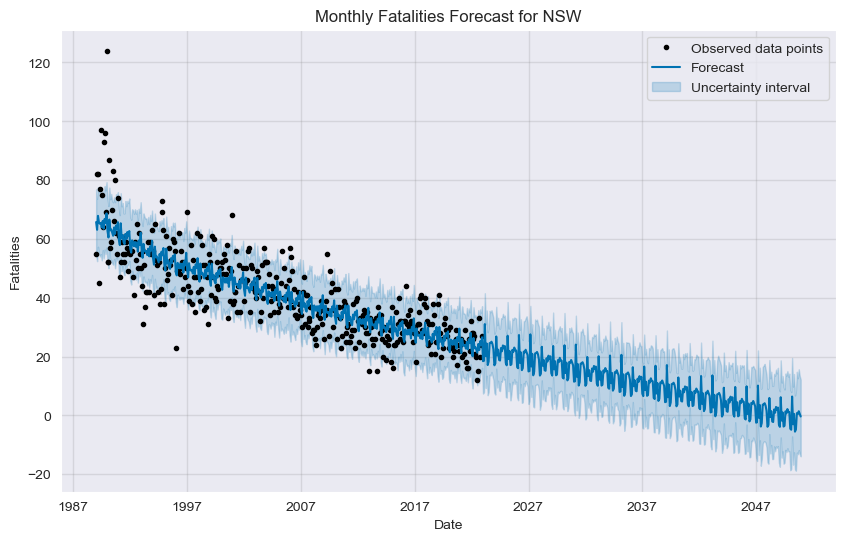

03:48:51 - cmdstanpy - INFO - Chain [1] start processing
03:48:51 - cmdstanpy - INFO - Chain [1] done processing


Forecast for 2023 for state NSW:
            ds       yhat  yhat_lower  yhat_upper
409 2023-01-31  18.583797    7.965561   29.218804
410 2023-02-28  31.052350   19.406839   41.552281
411 2023-03-31  20.134094    9.316466   31.013444
412 2023-04-30  24.435324   13.499548   35.676782
413 2023-05-31  17.135804    6.886623   28.281275
414 2023-06-30  18.319441    7.902567   29.797886
415 2023-07-31  24.580791   13.851991   35.588586
416 2023-08-31  24.692816   13.561618   35.045844
417 2023-09-30  25.062920   14.780343   35.780354
418 2023-10-31  24.251471   13.444564   34.537656
419 2023-11-30  22.500380   12.150491   33.126474
420 2023-12-31  17.043367    7.670351   27.778456
Forecast for 2050 for state NSW:
            ds      yhat  yhat_lower  yhat_upper
733 2050-01-31 -4.858804  -18.178962    7.969132
734 2050-02-28  6.431121   -7.125432   19.524221
735 2050-03-31 -2.993459  -16.727115    9.789052
736 2050-04-30  0.531939  -12.515748   14.079386
737 2050-05-31 -5.512699  -18.315561   

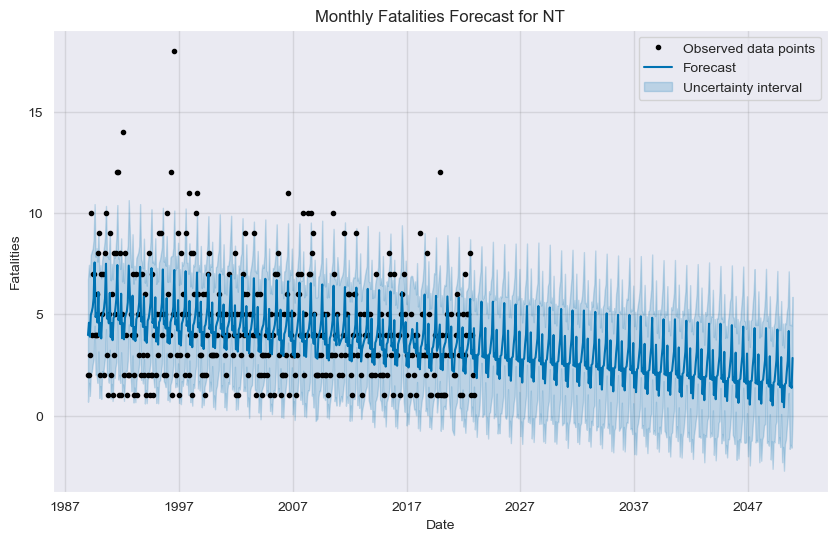

03:48:51 - cmdstanpy - INFO - Chain [1] start processing
03:48:51 - cmdstanpy - INFO - Chain [1] done processing


Forecast for 2023 for state NT:
            ds      yhat  yhat_lower  yhat_upper
398 2023-01-31  2.987314    0.057635    5.800929
399 2023-02-28  1.846228   -1.053063    4.993726
400 2023-03-31  3.003559   -0.059090    5.881347
401 2023-04-30  3.020871   -0.005165    6.149550
402 2023-05-31  3.720595    0.538553    6.713116
403 2023-06-30  4.217534    1.621134    7.117283
404 2023-07-31  5.621464    2.604775    8.350630
405 2023-08-31  2.896640   -0.064525    5.772537
406 2023-09-30  3.019087    0.082529    5.792909
407 2023-10-31  2.853420    0.043026    5.995266
408 2023-11-30  4.324379    1.645103    7.361900
409 2023-12-31  2.097376   -0.912912    5.040848
Forecast for 2050 for state NT:
            ds      yhat  yhat_lower  yhat_upper
722 2050-01-31  1.478228   -1.544385    4.537101
723 2050-02-28  0.411657   -2.720071    3.359406
724 2050-03-31  1.553937   -1.392661    4.552821
725 2050-04-30  1.590237   -1.190510    4.506498
726 2050-05-31  2.210716   -0.579071    5.112799
727 2

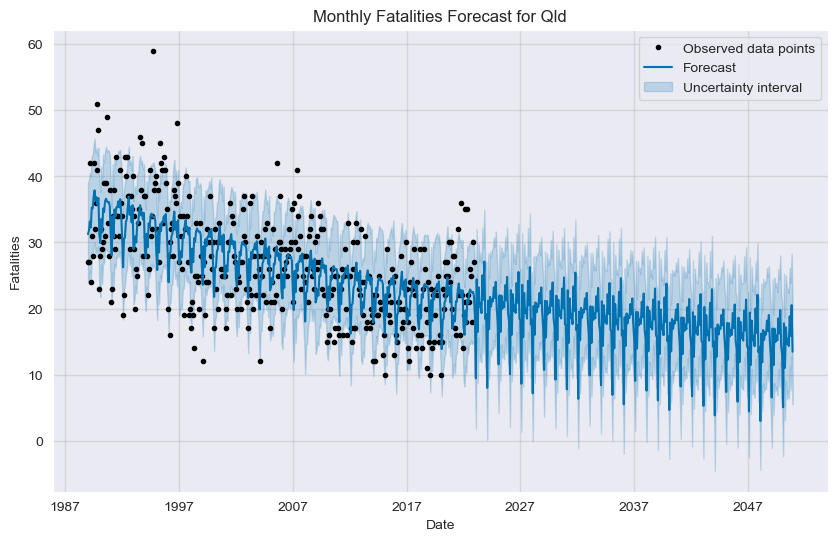

03:48:52 - cmdstanpy - INFO - Chain [1] start processing
03:48:52 - cmdstanpy - INFO - Chain [1] done processing


Forecast for 2023 for state Qld:
            ds       yhat  yhat_lower  yhat_upper
409 2023-01-31   9.458183    1.821365   17.345793
410 2023-02-28  24.424266   16.569334   32.069350
411 2023-03-31  16.473181    8.702455   23.851623
412 2023-04-30  23.207622   15.706632   29.855369
413 2023-05-31  20.207898   12.037516   27.255568
414 2023-06-30  20.770125   13.008947   28.414904
415 2023-07-31  19.319057   11.909461   26.802688
416 2023-08-31  25.037280   17.559066   32.280591
417 2023-09-30  21.342880   13.170720   29.059993
418 2023-10-31  27.106139   19.515148   34.970448
419 2023-11-30  18.421074   10.960036   26.236948
420 2023-12-31  19.172988   12.160326   27.020252
Forecast for 2050 for state Qld:
            ds       yhat  yhat_lower  yhat_upper
733 2050-01-31   5.072069   -2.351943   12.864981
734 2050-02-28  17.775153    9.670689   25.317997
735 2050-03-31  11.036857    3.110179   18.655533
736 2050-04-30  17.162611    9.079573   25.020758
737 2050-05-31  14.669761    6.277

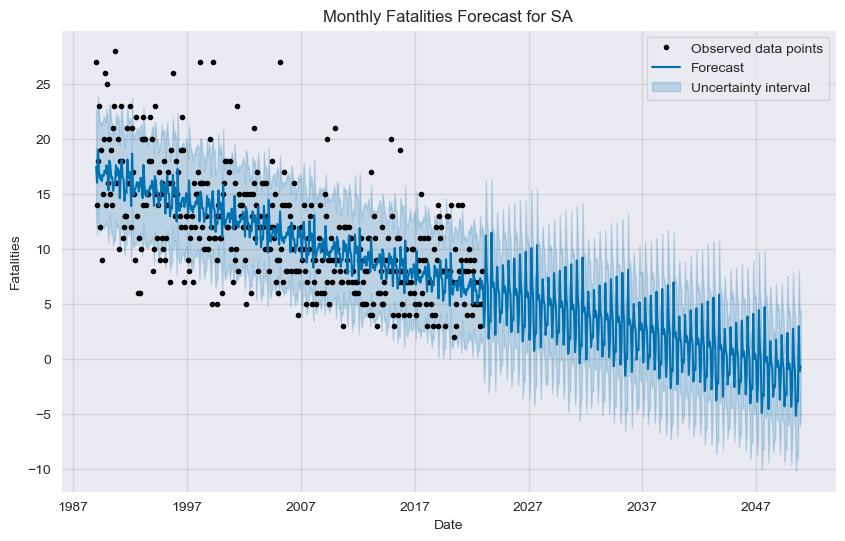

03:48:52 - cmdstanpy - INFO - Chain [1] start processing
03:48:52 - cmdstanpy - INFO - Chain [1] done processing


Forecast for 2023 for state SA:
            ds       yhat  yhat_lower  yhat_upper
409 2023-01-31   2.877580   -2.111336    7.450742
410 2023-02-28   4.407305   -0.431830    9.578383
411 2023-03-31  11.217568    6.264033   16.246784
412 2023-04-30   7.953471    2.945445   12.759430
413 2023-05-31   6.620182    1.719563   11.732223
414 2023-06-30   1.866306   -3.004982    6.308021
415 2023-07-31   3.595898   -1.198320    8.394485
416 2023-08-31   3.417310   -1.491629    8.145147
417 2023-09-30  11.485101    6.972980   16.372632
418 2023-10-31   6.554920    1.604168   11.330033
419 2023-11-30   6.962727    2.403915   11.908625
420 2023-12-31   6.225904    1.445322   10.935952
Forecast for 2050 for state SA:
            ds      yhat  yhat_lower  yhat_upper
733 2050-01-31 -4.336670   -9.574996    0.328776
734 2050-02-28 -2.627890   -7.654437    2.531298
735 2050-03-31  2.753644   -2.288052    7.848376
736 2050-04-30 -0.032355   -5.018300    4.770952
737 2050-05-31 -1.069259   -6.114710    4

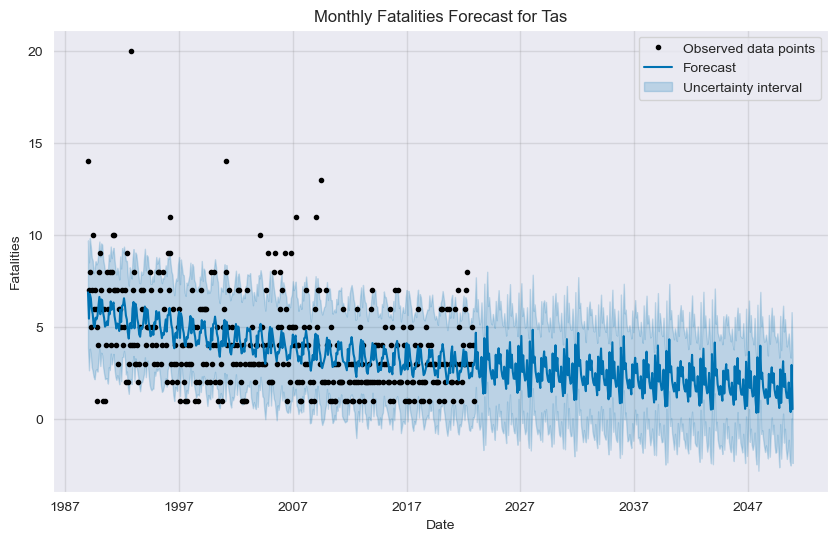

03:48:53 - cmdstanpy - INFO - Chain [1] start processing
03:48:53 - cmdstanpy - INFO - Chain [1] done processing


Forecast for 2023 for state Tas:
            ds      yhat  yhat_lower  yhat_upper
391 2023-01-31  4.693164    1.749495    7.698241
392 2023-02-28  2.732167   -0.159522    5.842604
393 2023-03-31  3.641380    0.785678    6.513310
394 2023-04-30  2.643798   -0.221932    5.602449
395 2023-05-31  2.267070   -0.566813    5.141401
396 2023-06-30  2.364437   -0.367633    5.295201
397 2023-07-31  3.378751    0.361010    6.337709
398 2023-08-31  2.063388   -0.827863    5.014791
399 2023-09-30  1.383444   -1.672476    4.282927
400 2023-10-31  4.397970    1.243690    7.356999
401 2023-11-30  1.414153   -1.395235    4.582986
402 2023-12-31  3.150913    0.111219    6.188802
Forecast for 2050 for state Tas:
            ds      yhat  yhat_lower  yhat_upper
715 2050-01-31  3.146694    0.303470    6.160066
716 2050-02-28  1.749964   -1.273043    4.755933
717 2050-03-31  2.461120   -0.519164    5.428607
718 2050-04-30  1.531176   -1.587004    4.561467
719 2050-05-31  1.168479   -2.160038    3.943749
720

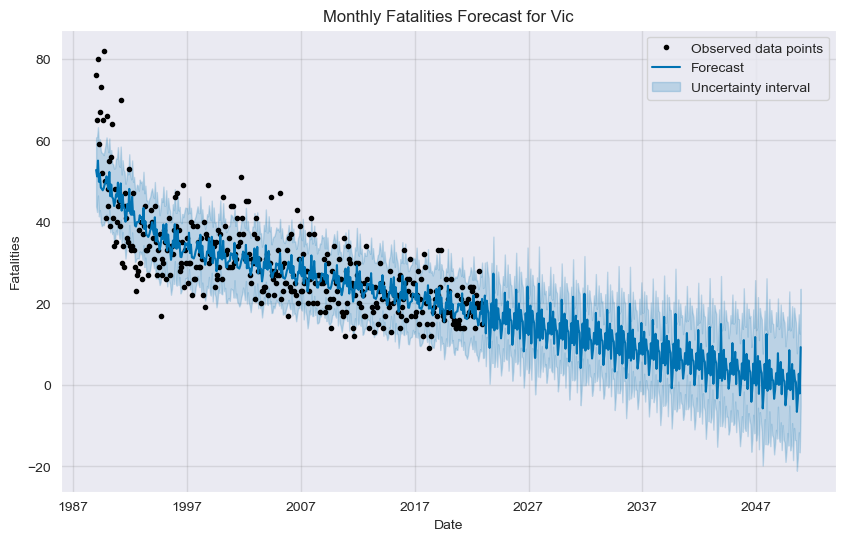

03:48:53 - cmdstanpy - INFO - Chain [1] start processing
03:48:53 - cmdstanpy - INFO - Chain [1] done processing


Forecast for 2023 for state Vic:
            ds       yhat  yhat_lower  yhat_upper
409 2023-01-31  15.872978    6.695579   24.037768
410 2023-02-28  21.918759   12.428346   30.003747
411 2023-03-31  12.629343    4.588929   21.906363
412 2023-04-30  20.657863   11.831228   30.235623
413 2023-05-31  18.419152   10.062358   27.684667
414 2023-06-30  17.718203    9.579584   26.298221
415 2023-07-31   9.067937    0.271551   17.455486
416 2023-08-31  12.945698    4.548256   22.141466
417 2023-09-30  19.988308   10.831457   29.931939
418 2023-10-31  14.051568    5.342740   23.047107
419 2023-11-30  27.301468   18.512894   36.376130
420 2023-12-31  13.366409    4.388786   22.598257
Forecast for 2050 for state Vic:
            ds      yhat  yhat_lower  yhat_upper
733 2050-01-31 -0.620138  -14.835431   14.403317
734 2050-02-28  5.111278   -9.386969   19.302246
735 2050-03-31 -3.500643  -18.469725   11.651401
736 2050-04-30  3.525574  -10.578582   18.932153
737 2050-05-31  1.182952  -13.535595   

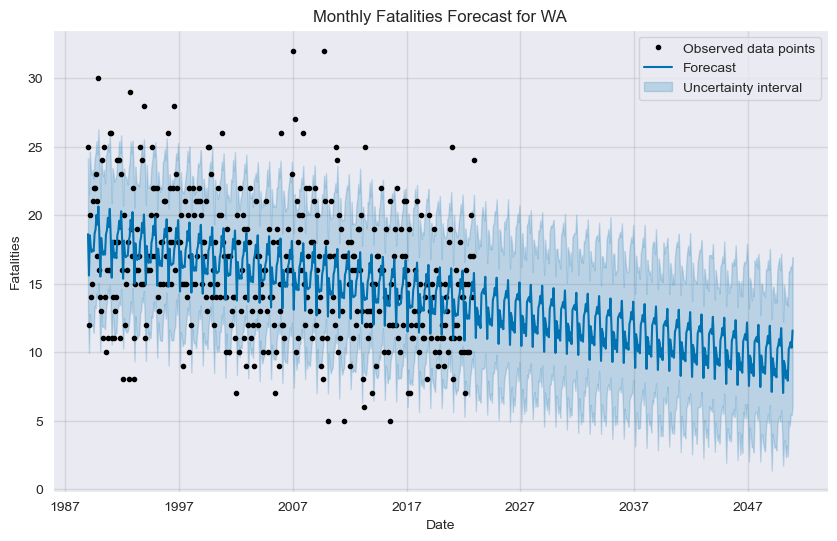

Forecast for 2023 for state WA:
            ds       yhat  yhat_lower  yhat_upper
409 2023-01-31  11.028325    5.693497   16.936563
410 2023-02-28  13.243708    7.609141   19.294572
411 2023-03-31  13.034694    7.397114   18.581715
412 2023-04-30  11.965487    6.480559   17.531296
413 2023-05-31  12.607990    6.773698   18.220827
414 2023-06-30  11.747949    6.308973   17.724878
415 2023-07-31  14.255932    8.688033   19.722166
416 2023-08-31  14.441129    8.840676   20.597730
417 2023-09-30  14.600528    8.756694   19.955547
418 2023-10-31  14.242807    8.900914   19.592010
419 2023-11-30  15.495588    9.904542   21.015556
420 2023-12-31  13.550380    8.166256   19.227867
Forecast for 2050 for state WA:
            ds       yhat  yhat_lower  yhat_upper
733 2050-01-31   7.009697    1.695379   12.244673
734 2050-02-28   9.350263    3.427580   14.916944
735 2050-03-31   9.024350    3.566779   14.351372
736 2050-04-30   8.080363    2.325128   13.519667
737 2050-05-31   8.642478    3.17738

In [9]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt

# فرض کنید data داده‌های اولیه شما باشد
# data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))
# monthly_fatalities = data.groupby(['State', 'Date']).size().reset_index(name='Fatalities')

def predict_state(state):
    
    state_data = monthly_fatalities[monthly_fatalities['State'] == state]

    state_data = state_data.rename(columns={'Date': 'ds', 'Fatalities': 'y'})

    train_data = state_data[state_data['ds'] < '2022-12-12']

    model = Prophet(yearly_seasonality=True, daily_seasonality=False, weekly_seasonality=False)
    model.fit(train_data)

    last_date = train_data['ds'].max()
    periods_to_predict = ((2050 - last_date.year) * 12) - last_date.month + 12  # From the next month to 2050 inclusive

    future = model.make_future_dataframe(periods=periods_to_predict, freq='M')

    forecast = model.predict(future)

    fig, ax = plt.subplots(figsize=(10, 6))
    model.plot(forecast, ax=ax)

    ax.set_title(f'Monthly Fatalities Forecast for {state}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Fatalities')
    ax.legend()
    plt.show()

    # Print the forecast for 2023
    forecast_2023 = forecast[(forecast['ds'] >= '2023-01-01') & (forecast['ds'] <= '2023-12-31')]
    print(f"Forecast for 2023 for state {state}:")
    print(forecast_2023[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

    # Print the forecast for 2050
    forecast_2050 = forecast[(forecast['ds'] >= '2050-01-01') & (forecast['ds'] <= '2050-12-31')]
    print(f"Forecast for 2050 for state {state}:")
    print(forecast_2050[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])


states = monthly_fatalities['State'].unique()

for state in states:
    predict_state(state)


03:11:49 - cmdstanpy - INFO - Chain [1] start processing
03:11:49 - cmdstanpy - INFO - Chain [1] done processing


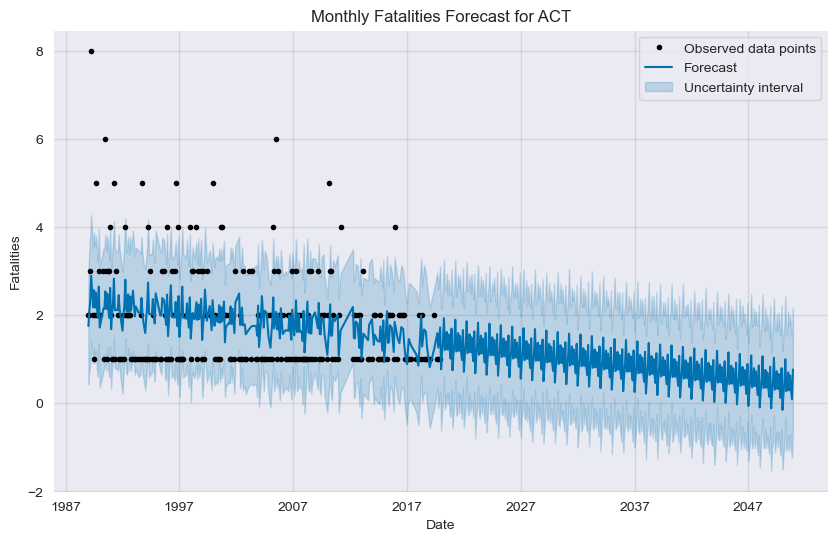

03:11:50 - cmdstanpy - INFO - Chain [1] start processing
03:11:50 - cmdstanpy - INFO - Chain [1] done processing


Forecast for 2050 for state ACT:
            ds      yhat
608 2050-01-31  0.216390
609 2050-02-28  0.460456
610 2050-03-31  0.996873
611 2050-04-30  0.272656
612 2050-05-31  0.307062
613 2050-06-30  0.699018
614 2050-07-31  0.295404
615 2050-08-31  0.631742
616 2050-09-30  0.300361
617 2050-10-31  0.088555
618 2050-11-30  0.764991


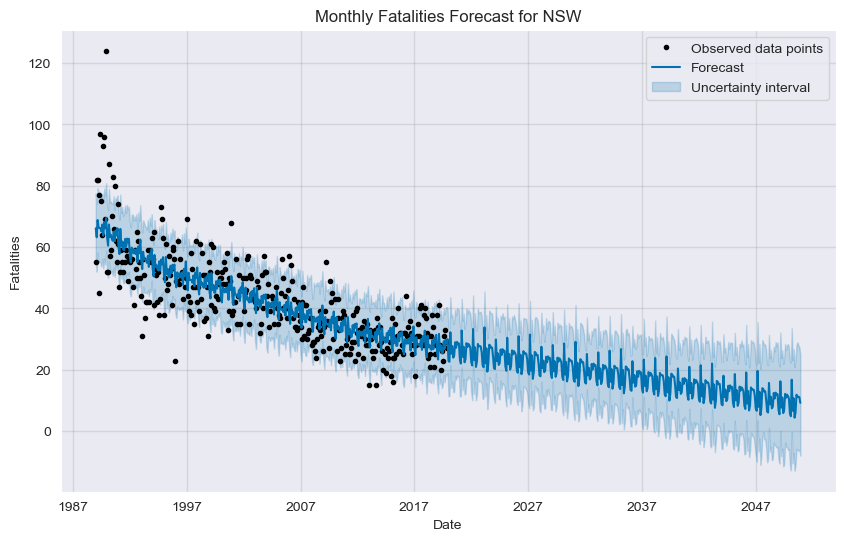

03:11:50 - cmdstanpy - INFO - Chain [1] start processing
03:11:50 - cmdstanpy - INFO - Chain [1] done processing


Forecast for 2050 for state NSW:
            ds       yhat
733 2050-01-31   4.865914
734 2050-02-28  16.768104
735 2050-03-31   6.642824
736 2050-04-30  10.732013
737 2050-05-31   4.388035
738 2050-06-30   6.055646
739 2050-07-31  11.884718
740 2050-08-31  11.105659
741 2050-09-30  11.236637
742 2050-10-31  11.058741
743 2050-11-30   9.218707


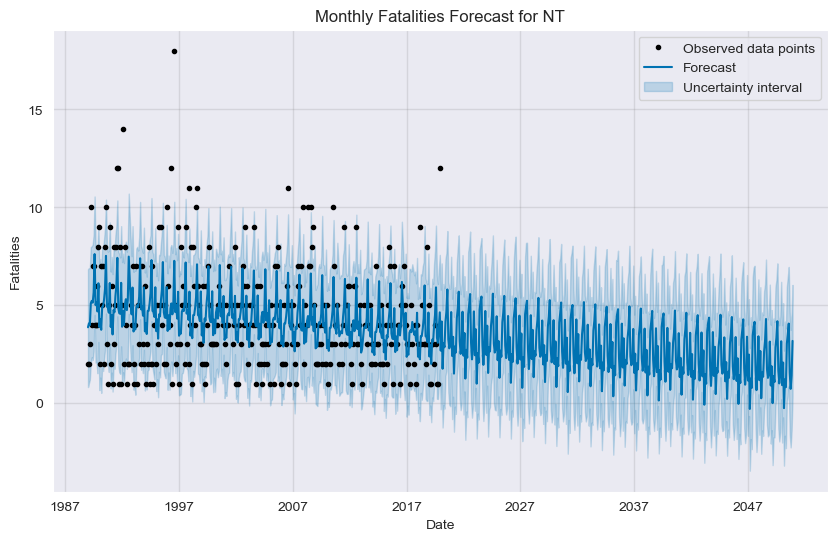

03:11:50 - cmdstanpy - INFO - Chain [1] start processing
03:11:51 - cmdstanpy - INFO - Chain [1] done processing


Forecast for 2050 for state NT:
            ds      yhat
724 2050-01-31  2.073112
725 2050-02-28 -0.253897
726 2050-03-31  1.212674
727 2050-04-30  0.814960
728 2050-05-31  3.043667
729 2050-06-30  3.504144
730 2050-07-31  4.063194
731 2050-08-31  1.560493
732 2050-09-30  0.726864
733 2050-10-31  1.413976
734 2050-11-30  3.177809


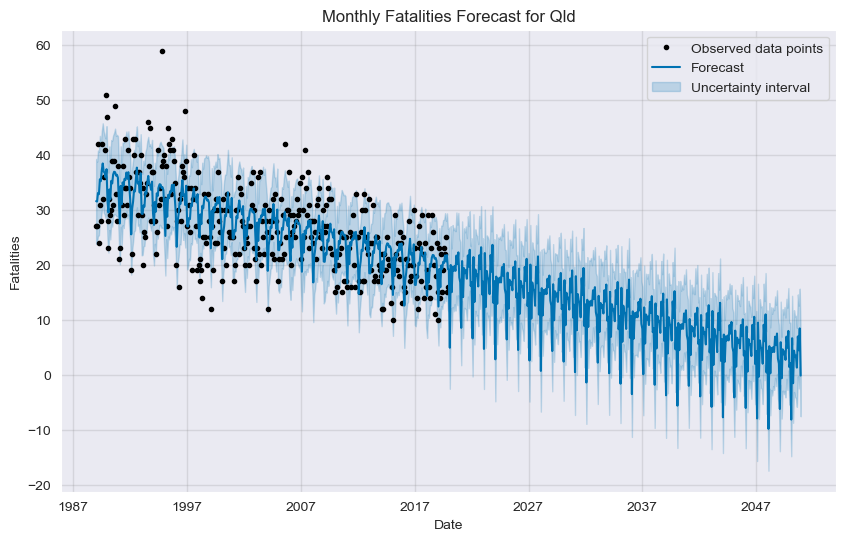

03:11:51 - cmdstanpy - INFO - Chain [1] start processing
03:11:51 - cmdstanpy - INFO - Chain [1] done processing


Forecast for 2050 for state Qld:
            ds      yhat
733 2050-01-31 -8.159975
734 2050-02-28  6.653625
735 2050-03-31 -1.540304
736 2050-04-30  4.381968
737 2050-05-31  3.305034
738 2050-06-30  3.482285
739 2050-07-31  1.302186
740 2050-08-31  6.967392
741 2050-09-30  4.458295
742 2050-10-31  8.441825
743 2050-11-30 -0.143628


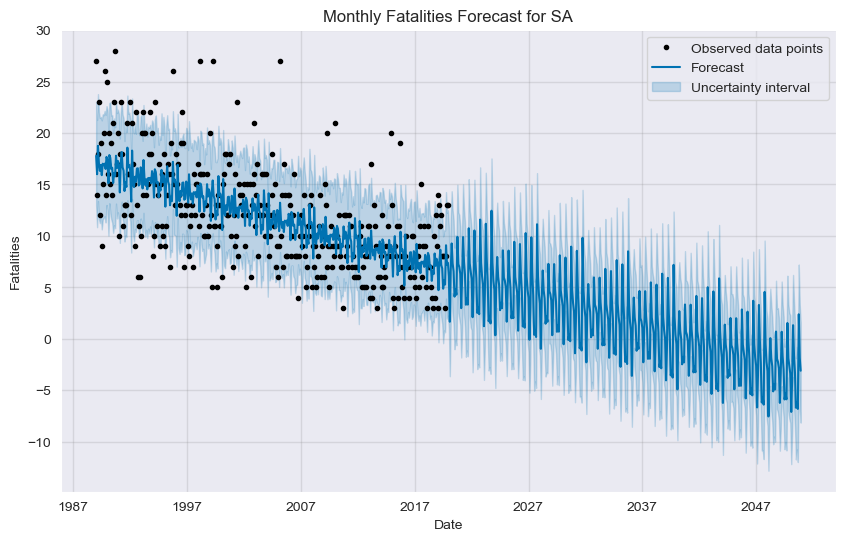

03:11:51 - cmdstanpy - INFO - Chain [1] start processing
03:11:51 - cmdstanpy - INFO - Chain [1] done processing


Forecast for 2050 for state SA:
            ds      yhat
733 2050-01-31 -7.111882
734 2050-02-28 -4.123233
735 2050-03-31  1.317379
736 2050-04-30 -1.578830
737 2050-05-31 -3.311344
738 2050-06-30 -6.697899
739 2050-07-31 -6.165546
740 2050-08-31 -6.818596
741 2050-09-30  2.379271
742 2050-10-31 -1.844984
743 2050-11-30 -3.105457


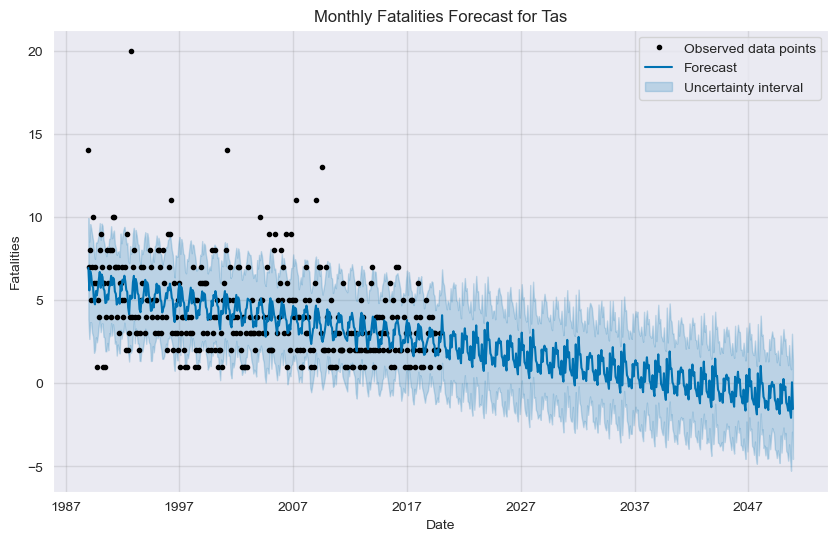

03:11:52 - cmdstanpy - INFO - Chain [1] start processing
03:11:52 - cmdstanpy - INFO - Chain [1] done processing


Forecast for 2050 for state Tas:
            ds      yhat
718 2050-01-31  0.254791
719 2050-02-28 -0.414999
720 2050-03-31 -0.202520
721 2050-04-30 -1.176110
722 2050-05-31 -1.322528
723 2050-06-30 -1.652139
724 2050-07-31 -0.821541
725 2050-08-31 -1.687384
726 2050-09-30 -2.081588
727 2050-10-31  0.057775
728 2050-11-30 -1.546381


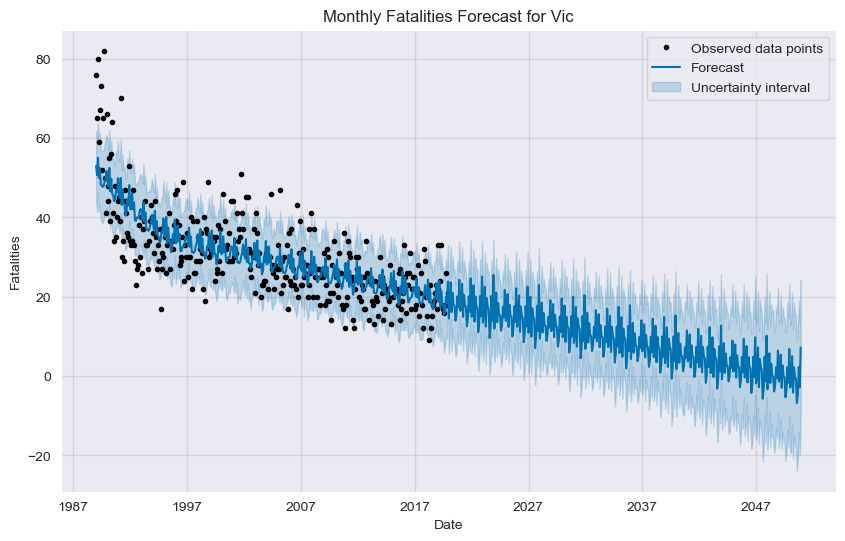

03:11:52 - cmdstanpy - INFO - Chain [1] start processing
03:11:52 - cmdstanpy - INFO - Chain [1] done processing


Forecast for 2050 for state Vic:
            ds      yhat
733 2050-01-31 -1.021596
734 2050-02-28  5.013187
735 2050-03-31 -4.176309
736 2050-04-30  2.188206
737 2050-05-31 -0.244710
738 2050-06-30 -0.670372
739 2050-07-31 -6.821452
740 2050-08-31 -4.661950
741 2050-09-30  2.293514
742 2050-10-31 -2.826533
743 2050-11-30  7.213898


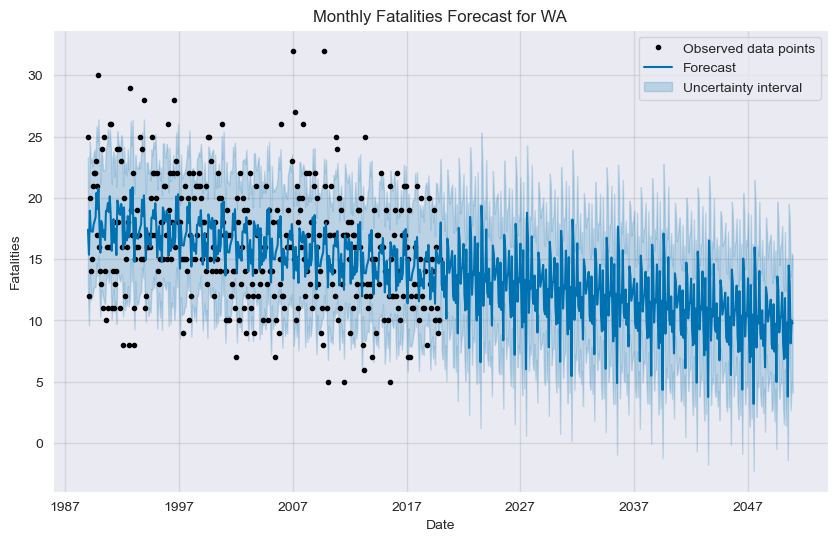

Forecast for 2050 for state WA:
            ds       yhat
733 2050-01-31   8.144247
734 2050-02-28   6.849670
735 2050-03-31  11.828294
736 2050-04-30   6.972860
737 2050-05-31   9.832010
738 2050-06-30   3.794718
739 2050-07-31  14.481701
740 2050-08-31  12.893252
741 2050-09-30   8.129381
742 2050-10-31  10.009754
743 2050-11-30   9.765507


In [4]:


data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))

monthly_fatalities = data.groupby(['State', 'Date']).size().reset_index(name='Fatalities')

def predict_state(state):
    
    state_data = monthly_fatalities[monthly_fatalities['State'] == state]

    
    state_data = state_data.rename(columns={'Date': 'ds', 'Fatalities': 'y'})

   
    train_data = state_data[state_data['ds'] < '2020-01-01']

    
    model = Prophet(yearly_seasonality=True, daily_seasonality=False, weekly_seasonality=False)
    model.fit(train_data)

    
    last_date = train_data['ds'].max()
    periods_to_predict = ((2050 - last_date.year) * 12) - last_date.month + 12  # From the next month to 2050 inclusive

    
    future = model.make_future_dataframe(periods=periods_to_predict, freq='M')

    
    forecast = model.predict(future)

    
    fig, ax = plt.subplots(figsize=(10, 6))
    model.plot(forecast, ax=ax)

    ax.set_title(f'Monthly Fatalities Forecast for {state}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Fatalities')
    ax.legend()
    plt.show()

    # Print the forecast for 2050
    forecast_2050 = forecast[(forecast['ds'] >= '2050-01-01') & (forecast['ds'] <= '2050-12-31')]
    print(f"Forecast for 2050 for state {state}:")
    print(forecast_2050[['ds', 'yhat']])


states = monthly_fatalities['State'].unique()


for state in states:
    predict_state(state)


In [15]:
fatalities_by_state_month.head()

Date State  Fatalities
0 1989-01-01   ACT           2
1 1989-01-01   NSW          55
2 1989-01-01    NT           2
3 1989-01-01   Qld          27
4 1989-01-01    SA          27

In [6]:
import pandas as pd

# بارگذاری فایل CSV

# اطمینان از نوع داده‌ای صحیح ستون‌ها
data['Year'] = data['Year'].astype(int)
data['Month'] = data['Month'].astype(int)
data['State'] = data['State'].astype(str)

# ایجاد ستون تاریخ از سال و ماه
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))

# تجمیع داده‌ها بر اساس تاریخ و ایالت
fatalities_by_state_month = data.groupby(['Date', 'State']).size().reset_index(name='Fatalities')


15:28:16 - cmdstanpy - INFO - Chain [1] start processing
15:28:16 - cmdstanpy - INFO - Chain [1] done processing


Predictions for ACT - Q1 2024:
            ds      yhat  yhat_lower  yhat_upper
273 2024-01-01  0.780029   -1.230777    2.745707
274 2024-03-01  1.241353   -0.678892    3.349307


<Figure size 1000x600 with 0 Axes>

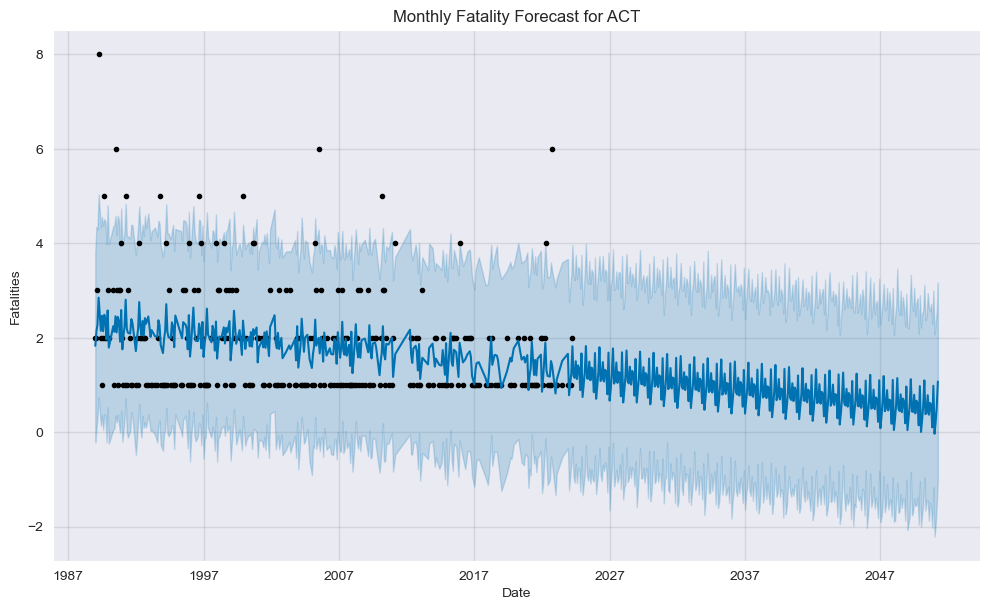

15:28:17 - cmdstanpy - INFO - Chain [1] start processing
15:28:17 - cmdstanpy - INFO - Chain [1] done processing


Predictions for NSW - Q1 2024:
            ds       yhat  yhat_lower  yhat_upper
420 2024-01-01  22.211639    5.470225   38.329541
421 2024-02-01  21.159796    5.174069   35.837464
422 2024-03-01  24.956345    8.635046   41.453351


<Figure size 1000x600 with 0 Axes>

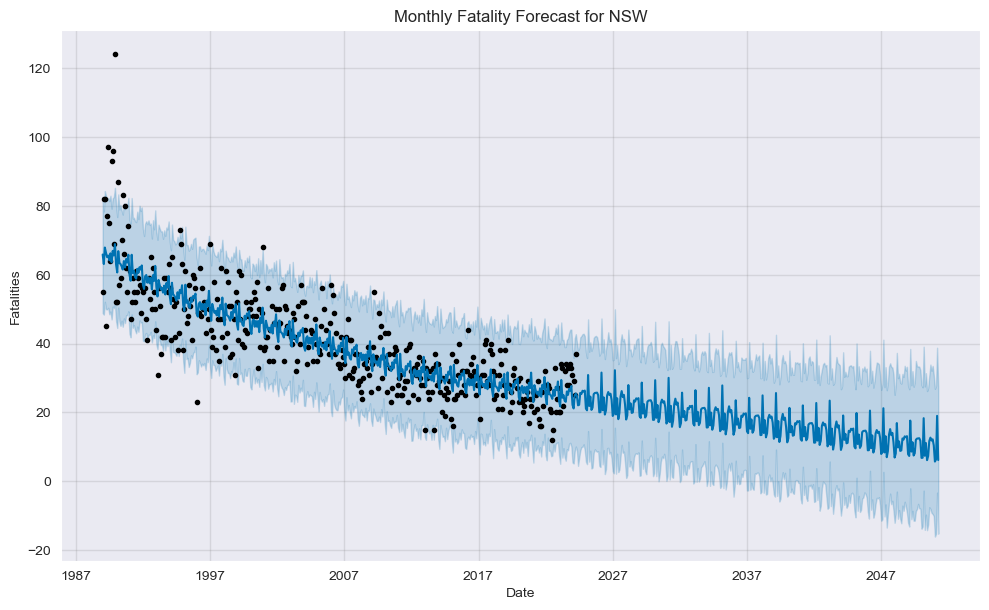

15:28:18 - cmdstanpy - INFO - Chain [1] start processing
15:28:18 - cmdstanpy - INFO - Chain [1] done processing


Predictions for NT - Q1 2024:
            ds      yhat  yhat_lower  yhat_upper
407 2024-01-01  2.071109   -2.482049    6.589799
408 2024-02-01  3.041035   -1.303726    7.678293
409 2024-03-01  2.194054   -1.998653    6.508948


<Figure size 1000x600 with 0 Axes>

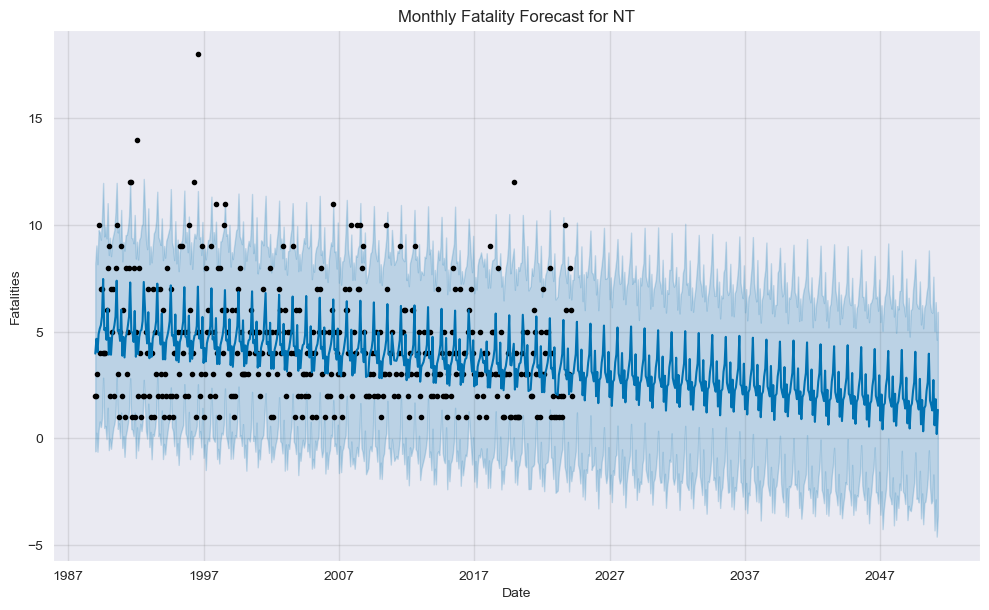

15:28:18 - cmdstanpy - INFO - Chain [1] start processing
15:28:18 - cmdstanpy - INFO - Chain [1] done processing


Predictions for Qld - Q1 2024:
            ds       yhat  yhat_lower  yhat_upper
420 2024-01-01  19.605964    7.963436   31.466645
421 2024-02-01  15.433397    3.925144   26.117498
422 2024-03-01  19.234120    7.400850   30.556940


<Figure size 1000x600 with 0 Axes>

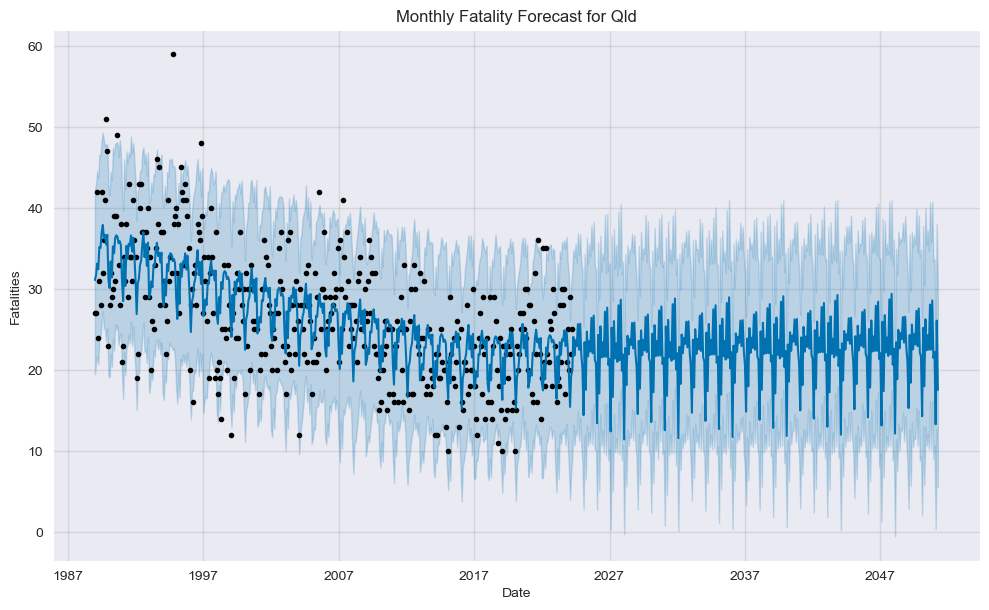

15:28:19 - cmdstanpy - INFO - Chain [1] start processing
15:28:19 - cmdstanpy - INFO - Chain [1] done processing


Predictions for SA - Q1 2024:
            ds      yhat  yhat_lower  yhat_upper
420 2024-01-01  6.991461   -0.911324   14.687413
421 2024-02-01  5.411379   -2.285813   13.296061
422 2024-03-01  8.767508    0.774528   16.273222


<Figure size 1000x600 with 0 Axes>

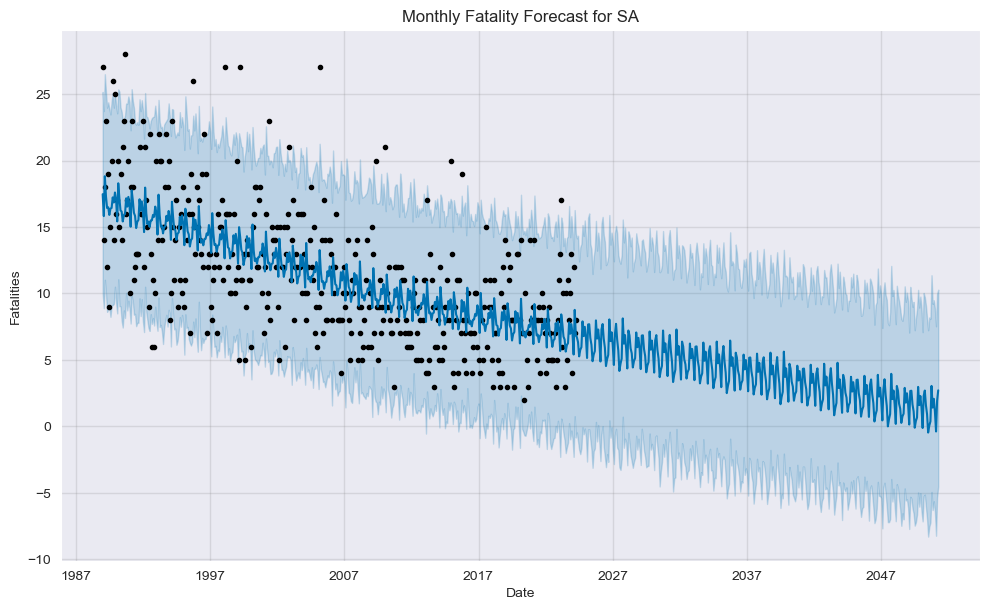

15:28:20 - cmdstanpy - INFO - Chain [1] start processing
15:28:20 - cmdstanpy - INFO - Chain [1] done processing


Predictions for Tas - Q1 2024:
            ds      yhat  yhat_lower  yhat_upper
402 2024-01-01  3.260885   -0.769040    7.546542
403 2024-03-01  3.647413   -0.785421    8.032197


<Figure size 1000x600 with 0 Axes>

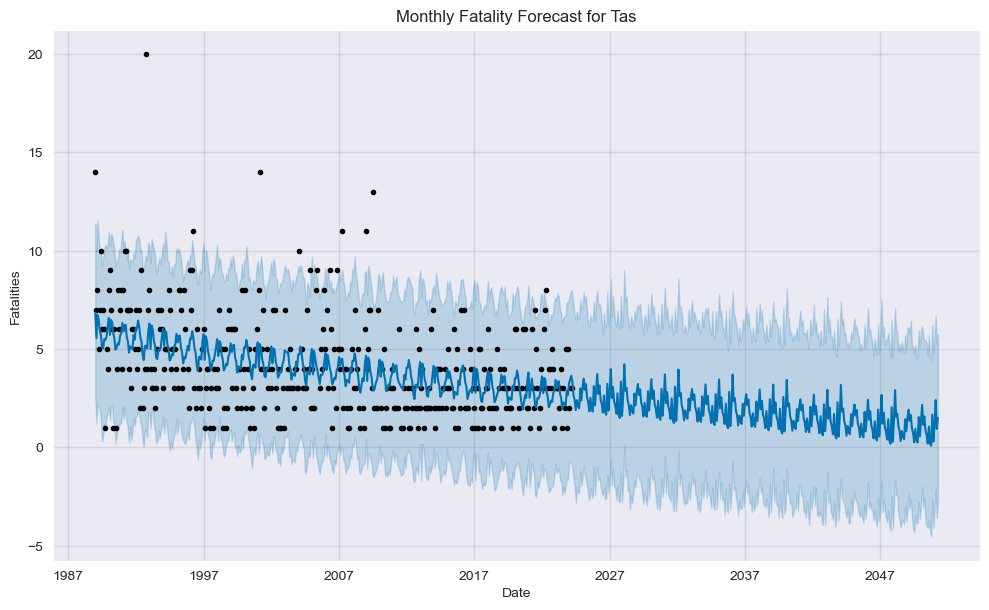

15:28:21 - cmdstanpy - INFO - Chain [1] start processing
15:28:21 - cmdstanpy - INFO - Chain [1] done processing


Predictions for Vic - Q1 2024:
            ds       yhat  yhat_lower  yhat_upper
420 2024-01-01  19.455295    6.438904   31.768279
421 2024-02-01  19.074422    4.915401   31.501333
422 2024-03-01  23.633711   10.412621   36.846235


<Figure size 1000x600 with 0 Axes>

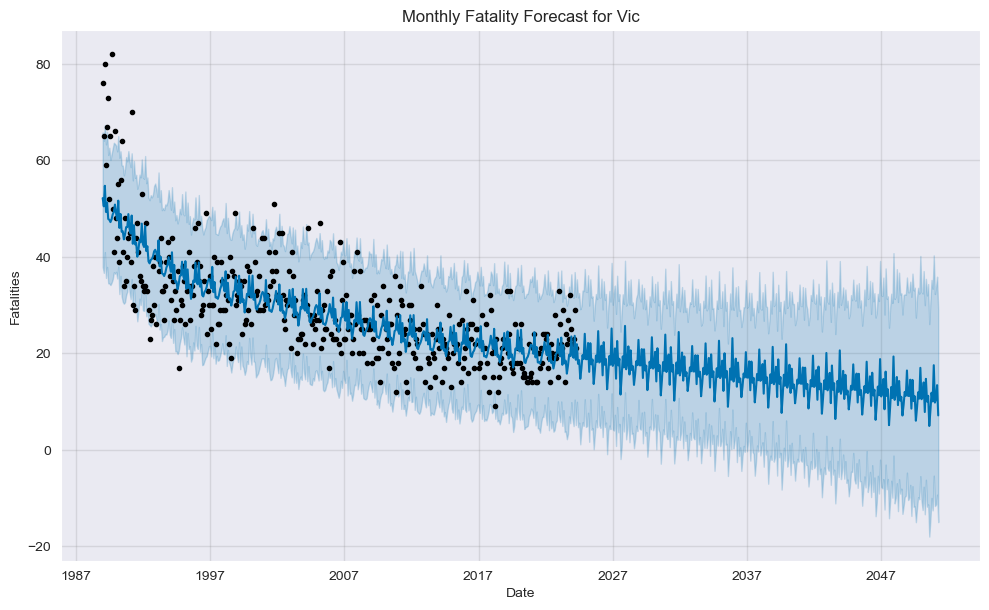

15:28:21 - cmdstanpy - INFO - Chain [1] start processing
15:28:21 - cmdstanpy - INFO - Chain [1] done processing


Predictions for WA - Q1 2024:
            ds       yhat  yhat_lower  yhat_upper
420 2024-01-01  13.682852    5.533556   21.410385
421 2024-02-01  10.845782    2.648028   18.875221
422 2024-03-01  13.927642    5.981176   21.804005


<Figure size 1000x600 with 0 Axes>

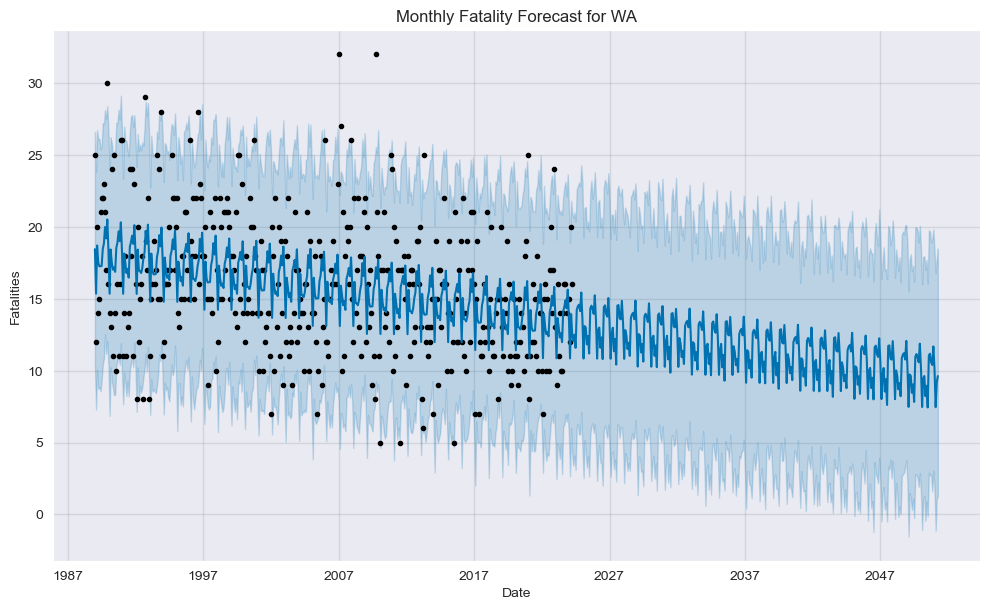

In [6]:
from prophet import Prophet
import matplotlib.pyplot as plt
import pandas as pd

# بارگذاری فایل CSV

# اطمینان از نوع داده‌ای صحیح ستون‌ها
data['Year'] = data['Year'].astype(int)
data['Month'] = data['Month'].astype(int)
data['State'] = data['State'].astype(str)

# ایجاد ستون تاریخ از سال و ماه
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))

# تجمیع داده‌ها بر اساس تاریخ و ایالت
fatalities_by_state_month = data.groupby(['Date', 'State']).size().reset_index(name='Fatalities')

# آماده‌سازی یک دیکشنری برای ذخیره پیش‌بینی‌ها
forecasts = {}

# لیست ایالت‌ها در دیتاست
states = fatalities_by_state_month['State'].unique()

# افق پیش‌بینی (ماه‌ها)
latest_date = fatalities_by_state_month['Date'].max()
forecast_horizon = (2050 - latest_date.year) * 12 + (12 - latest_date.month)

for state in states:
    # آماده‌سازی داده‌ها برای Prophet
    state_data = fatalities_by_state_month[fatalities_by_state_month['State'] == state][['Date', 'Fatalities']]
    state_data.columns = ['ds', 'y']

    # ایجاد و آموزش مدل Prophet
    model = Prophet(
        interval_width=0.95,
             #yearly_seasonality=True,weekly_seasonality=False,daily_seasonality=False,changepoint_prior_scale=0.05,seasonality_prior_scale=10.0
                  yearly_seasonality=True, daily_seasonality=False, weekly_seasonality=False  )
    model.fit(state_data)

    # ایجاد یک DataFrame برای نگهداری تاریخ‌های آینده
    future = model.make_future_dataframe(periods=324, freq='M')

    # انجام پیش‌بینی
    forecast = model.predict(future)

    # ذخیره پیش‌بینی در دیکشنری
    forecasts[state] = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

    # استخراج پیش‌بینی‌های سه ماه اول 2024
    forecast_2024_q1 = forecast[(forecast['ds'] >= '2024-01-01') & (forecast['ds'] <= '2024-03-31')]
    print(f'Predictions for {state} - Q1 2024:')
    print(forecast_2024_q1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

    # رسم نمودار پیش‌بینی
    plt.figure(figsize=(10, 6))
    model.plot(forecast)
    plt.title(f'Monthly Fatality Forecast for {state}')
    plt.xlabel('Date')
    plt.ylabel('Fatalities')
    plt.savefig(f'forecast_monthly_{state}.png')  # ذخیره نمودار به عنوان فایل تصویر
    plt.show()
